# Symulacja ciągów pseudolosowych, ich filtracja i analiza
1. Symulować szum biały o rozkładzie normlanym N(5, 0.1).
2. Na podstawie otrzymanego ciągu obliczyć gęstość prawdopodobieństwa, dystrybuantę, a też wartość oczekiwaną, wariancję i funkcję kowariancyjną.
3. Przeprowadzić filtrację danych z wykorzystaniem filtru dolnoprzepustowego FIR (SOJ) o różnych parametrach.
4. Obliczyć gęstość prawdopodobieństwa, dystrybuantę, a też wartość oczekiwaną, wariancję i funkcję kowariancyjną sygnału wyjściowego. Porównać wyniki z p 2.
Wyniki przedstawiać w postaci tablic oraz wykresów

# Literatura
1. Snopkowski R. Symulacja stochastyczna AGH, Kraków, 2007.
2. Niemiro W. Symulacje stochastyczne i metody Monte Carlo, Uniw. Warszawski, 2013.
3. Cacho K., Bily M., Bukowski J. Random processs, analysis and simulation, 1988
4. Othes R.K., Enochson Analiza numeryczna szeregów czasowych, WNT, Warszawa, 1988

-----------------------------------------

## Importowanie potrzebnych bibliotek

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, describe
from scipy import signal
import pandas  as pd
from IPython.display import display, Latex
from tabulate import tabulate
from matplotlib.gridspec import GridSpec

## 1. Symulacja szumu białego o rozkładzie normlanym N(5, 0.1).
### Wytworzenie szumu białego o rozkładzie Gassowskim

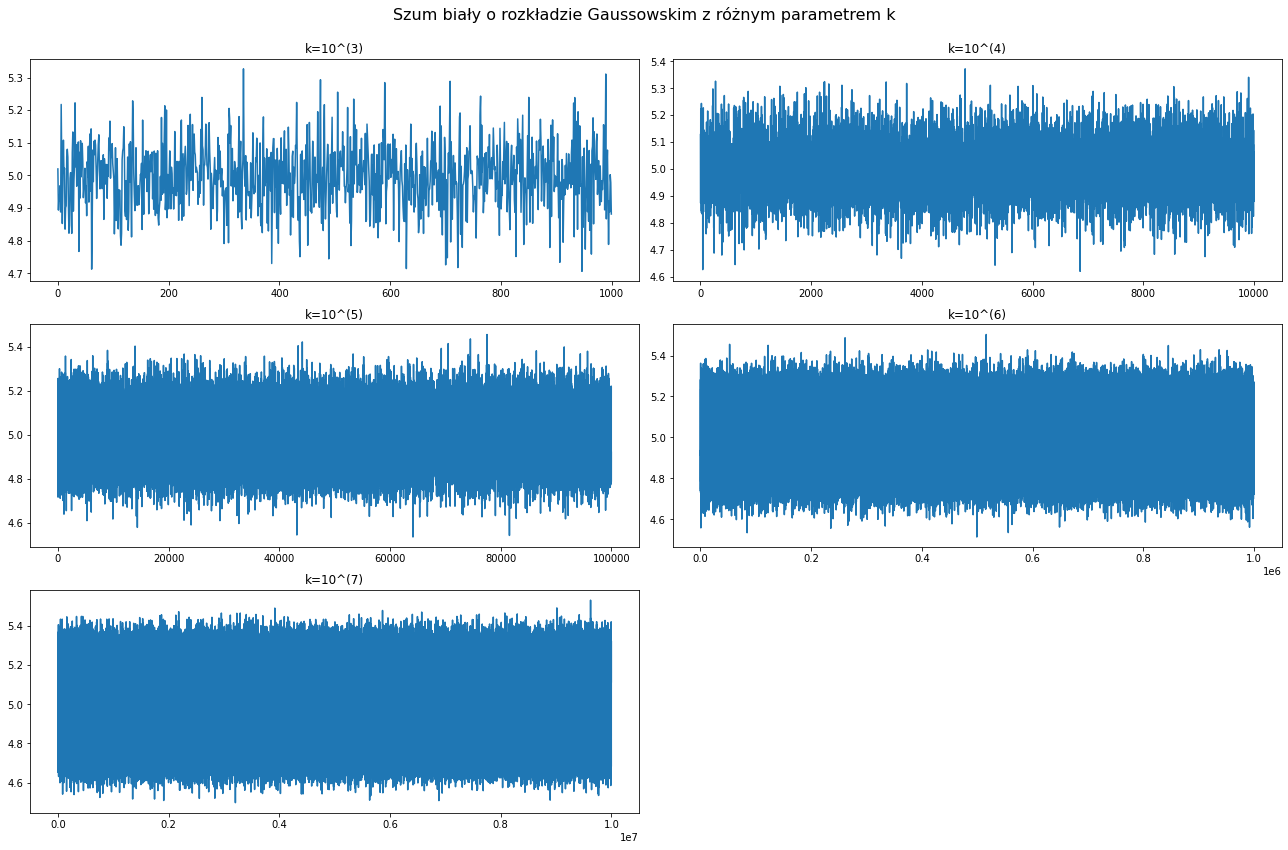

In [70]:
#Default parameters to describe white noise
mu = 5
sigma = 0.1
k_3 = pow(10,3)     #Amount of samples to generate white noise
k_4 = pow(10,4)
k_5 = pow(10,5)
k_6 = pow(10,6)
k_7 = pow(10,7)

samples_k_3 = np.random.normal(mu, sigma, size=k_3)
samples_k_4 = np.random.normal(mu, sigma, size=k_4)
samples_k_5 = np.random.normal(mu, sigma, size=k_5)
samples_k_6 = np.random.normal(mu, sigma, size=k_6)
samples_k_7 = np.random.normal(mu, sigma, size=k_7)

fig, axarr = plt.subplots(3, 2)
fig.set_figheight(12)
fig.set_figwidth(18)
fig.suptitle("Szum biały o rozkładzie Gaussowskim z różnym parametrem k", fontsize=16)

axarr[0, 0].plot(samples_k_3)
axarr[0, 0].set_title('k=10^(3)')
axarr[0, 1].plot(samples_k_4)
axarr[0, 1].set_title('k=10^(4)')
axarr[1, 0].plot(samples_k_5)
axarr[1, 0].set_title('k=10^(5)')
axarr[1, 1].plot(samples_k_6)
axarr[1, 1].set_title('k=10^(6)')
axarr[2, 0].plot(samples_k_7)
axarr[2, 0].set_title('k=10^(7)')
axarr[2, 1].set_visible(False)

# Tight layout often produces nice results
# but requires the title to be spaced accordingly
fig.tight_layout()
fig.subplots_adjust(top=0.92)

plt.show()

Powyższy wygenerowany diagram prezentuje szum biały składającego się z określonej liczby próbek zadeklarowanej w zmiennej <font color=yellow>samples_k{i}</font>. Szum biały jest rodzajem szumu akustycznego, który posiada całkowicie płaskie widmo. W procesie stochastycznym szum biały to ciąg nieskorelowanych zmiennych losowych o zerowej wartości oczekiwanej i stałej wariancji(czyli biały szum to proces kowariancyjnie stacjonarny) oraz w sensie ścisłym to biały szum w którym nieskorelowanie wzmianiamy do niezależności. Biały szum jest tak zwaną ,,cegiełką" podczas konstrukcji procesów stochastycznych. 

### Wyświetlenie histogramu szumu białego o charakterze Gaussowskim dla róznych k

In [71]:
def display_hist(samples, k):
    delta_x_1=1
    delta_x_2=0.6
    delta_x_3=0.3
    delta_x_4=0.1

    fig, axarr = plt.subplots(2, 2)
    fig.set_figheight(10)
    fig.set_figwidth(12)
    fig.suptitle("Histogram szumu białego z różną wartością Δx dla k={}".format(k), fontsize=16)

    axarr[0, 0].hist(samples, bins=int(6/delta_x_1))
    axarr[0, 0].set_title('Δx=1')
    axarr[0, 1].hist(samples, bins=int(6/delta_x_2))
    axarr[0, 1].set_title('Δx=0,6')
    axarr[1, 0].hist(samples, bins=int(6/delta_x_3))
    axarr[1, 0].set_title('Δx=0,3')
    axarr[1, 1].hist(samples, bins=int(6/delta_x_4))
    axarr[1, 1].set_title('Δx=0,1')

    # Tight layout often produces nice results
    # but requires the title to be spaced accordingly
    fig.tight_layout()
    fig.subplots_adjust(top=0.92)

    plt.show()

#### k=10^(3)

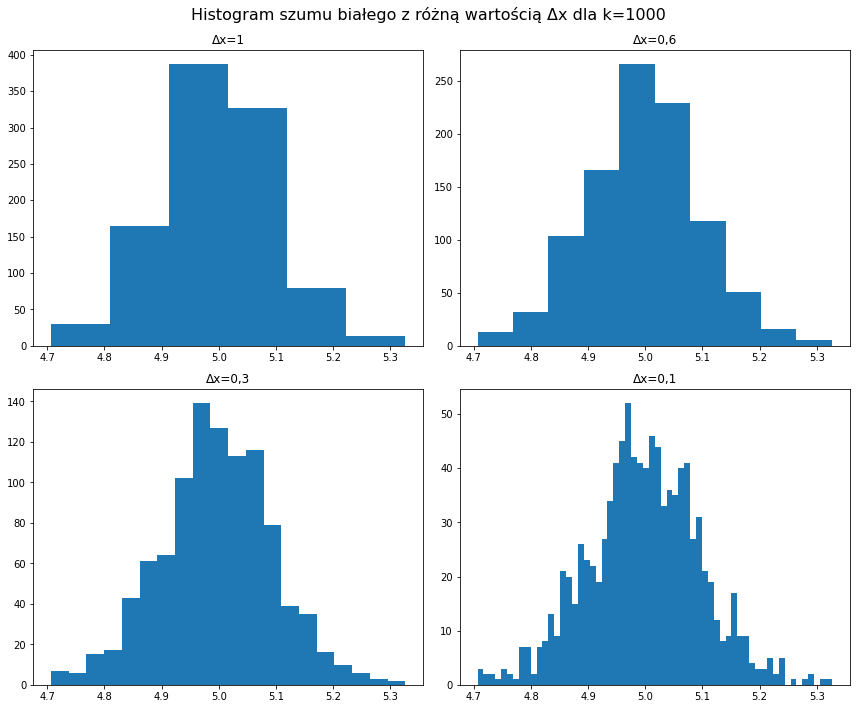

In [72]:
display_hist(samples_k_3, k_3)

#### k=10^(4)

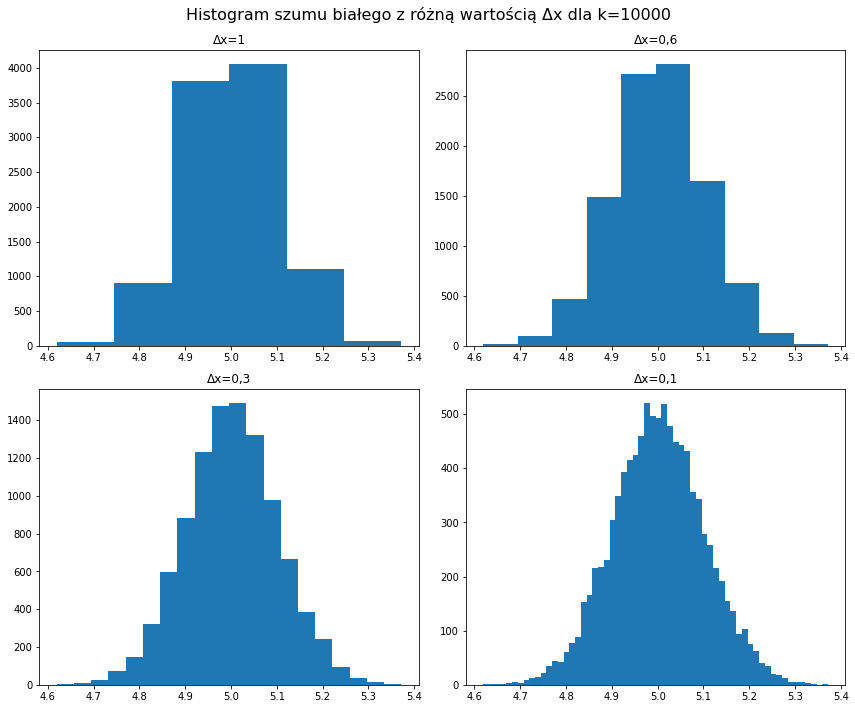

In [73]:
display_hist(samples_k_4, k_4)

#### k=10^(5)

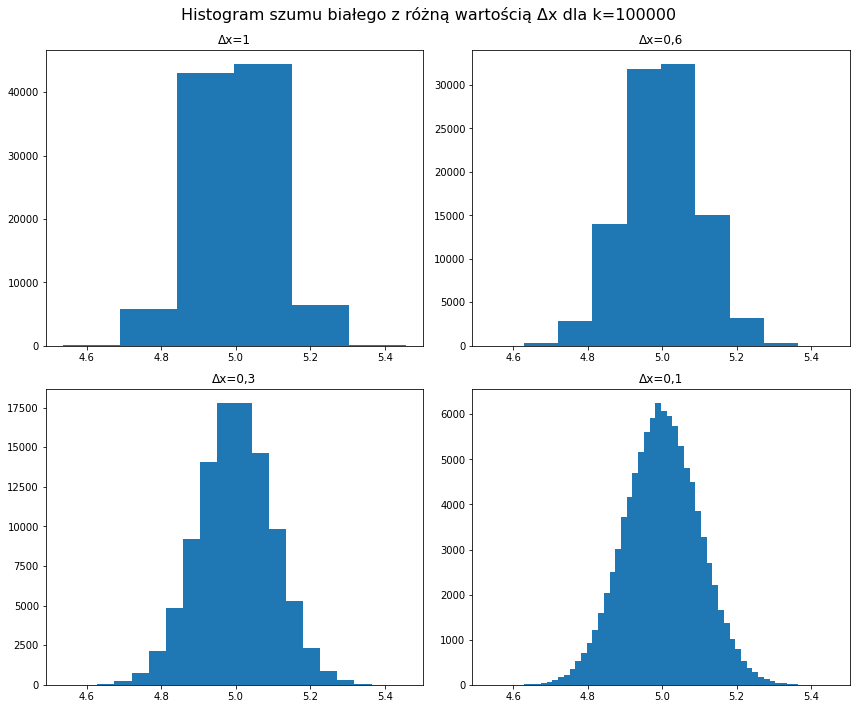

In [74]:
display_hist(samples_k_5, k_5)

####  k=10^(6)

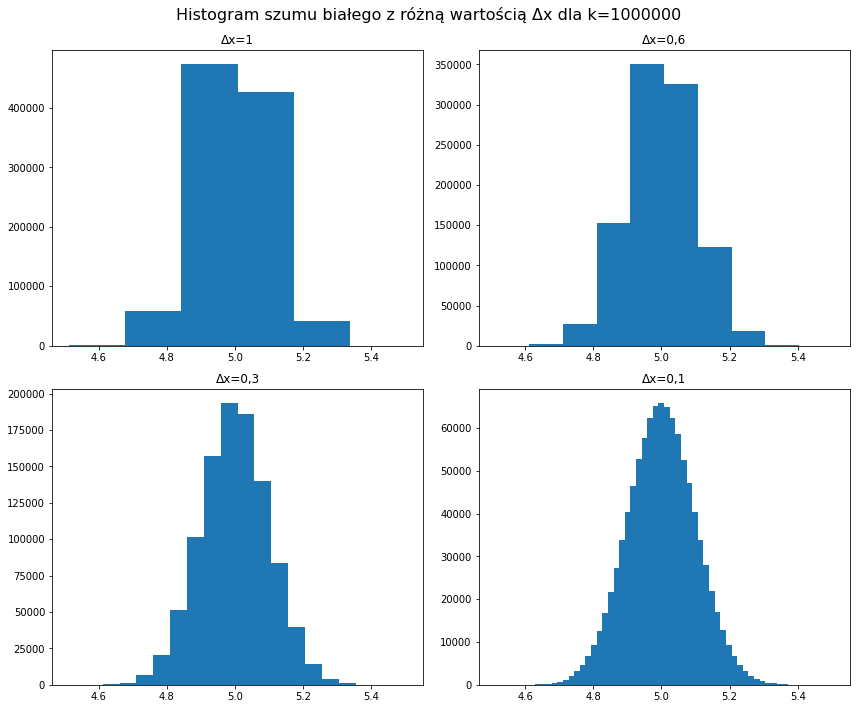

In [75]:
display_hist(samples_k_6, k_6)

#### k=10^(7)

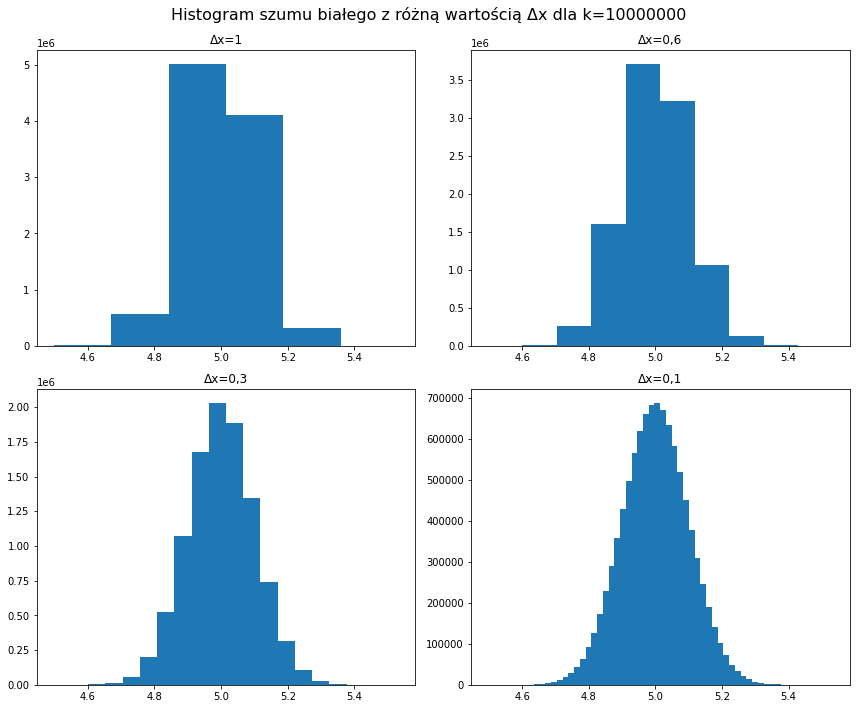

In [76]:
display_hist(samples_k_7, k_7)

## 2. Na podstawie otrzymanego ciągu obliczyć gęstość prawdopodobieństwta, dystrybuantę, a też wartość oczekiwan, wariancję i funkcję kowariancyjną.

### Obliczenie gęstości prawdopodobieństwa

<b>Gęstość prawdopodobieństwa</b> (ang. probability density function) to funkcja, która opisuje rozkład prawdopodobieństwa zmiennej losowej X. Gęstość prawdopodobieństwa może być używana do obliczenia prawdopodobieństwa wystąpienia wartości zmiennej losowej w określonym przedziale. W przeciwieństwie do dystrybuanty, gęstość prawdopodobieństwa nie jest równa prawdopodobieństwu, lecz określa szybkość zmian prawdopodobieństwa zmiennej losowej wokół danej wartości.

$$ f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}} $$

<font color=red>Uwaga aby wyświetlić gęstość prawdopodobieństwa należy posortować najpierw tablicę. Wytłumaczenie w linku poniżej</font>       
https://stackoverflow.com/questions/71296986/how-to-draw-the-probability-density-function-pdf-plot-in-python

In [77]:
def probability_pdf(samples):
    sort_samples = np.sort(samples)
    probability_pdf = norm.pdf(sort_samples, mu, sigma)
    return probability_pdf

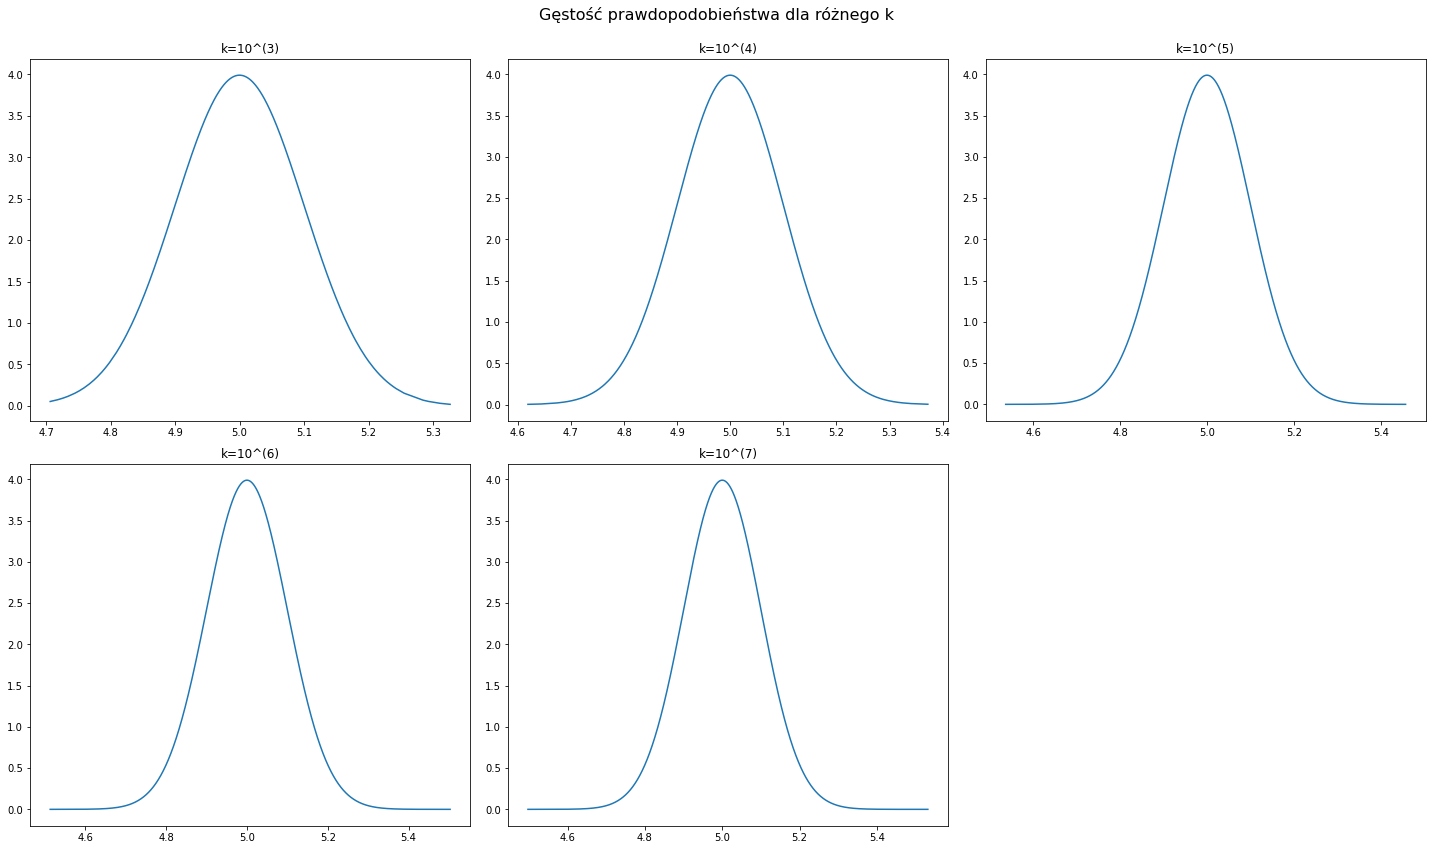

In [78]:
fig, axarr = plt.subplots(2, 3)
fig.set_figheight(12)
fig.set_figwidth(20)
fig.suptitle("Gęstość prawdopodobieństwa dla różnego k", fontsize=16)

axarr[0, 0].plot(np.sort(samples_k_3), probability_pdf(samples_k_3))
axarr[0, 0].set_title('k=10^(3)')
axarr[0, 1].plot(np.sort(samples_k_4), probability_pdf(samples_k_4))
axarr[0, 1].set_title('k=10^(4)')
axarr[0, 2].plot(np.sort(samples_k_5), probability_pdf(samples_k_5))
axarr[0, 2].set_title('k=10^(5)')
axarr[1, 0].plot(np.sort(samples_k_6), probability_pdf(samples_k_6))
axarr[1, 0].set_title('k=10^(6)')
axarr[1, 1].plot(np.sort(samples_k_7), probability_pdf(samples_k_7))
axarr[1, 1].set_title('k=10^(7)')
axarr[1, 2].set_visible(False)

# Tight layout often produces nice results
# but requires the title to be spaced accordingly
fig.tight_layout()
fig.subplots_adjust(top=0.92)

plt.show()

### Obliczenie dystrybuanty

<b>Dystrybuanta</b> - (ang. cumulative distribution function) to funkcja matematyczna, która określa prawdopodobieństwo, że losowo wybrana zmienna losowa X jest mniejsza lub równa danej wartości x, tzn. F(x) = P(X $\leq$ x). Dystrybuanta może być użyta do określenia takich wartości jak kwantyle (np. mediana) oraz do badania asymetrii i ogona rozkładu zmiennej losowej.

$$ F(x) = \frac{1}{2}\left[1 + \operatorname{erf}\left(\frac{x-\mu}{\sigma\sqrt{2}}\right)\right] $$

Podobnie jak dla obliczenia gęstości prawdopodobieństwa najpierw należało skorzystać z posortowanych wcześniej danych w tablicy <font color=yellow>samples</font>
https://stackoverflow.com/questions/24788200/calculate-the-cumulative-distribution-function-cdf-in-python

In [79]:
def norm_cdf(samples):
    sort_samples = np.sort(samples)
    norm_cdf = norm.cdf(sort_samples, mu, sigma)
    return norm_cdf

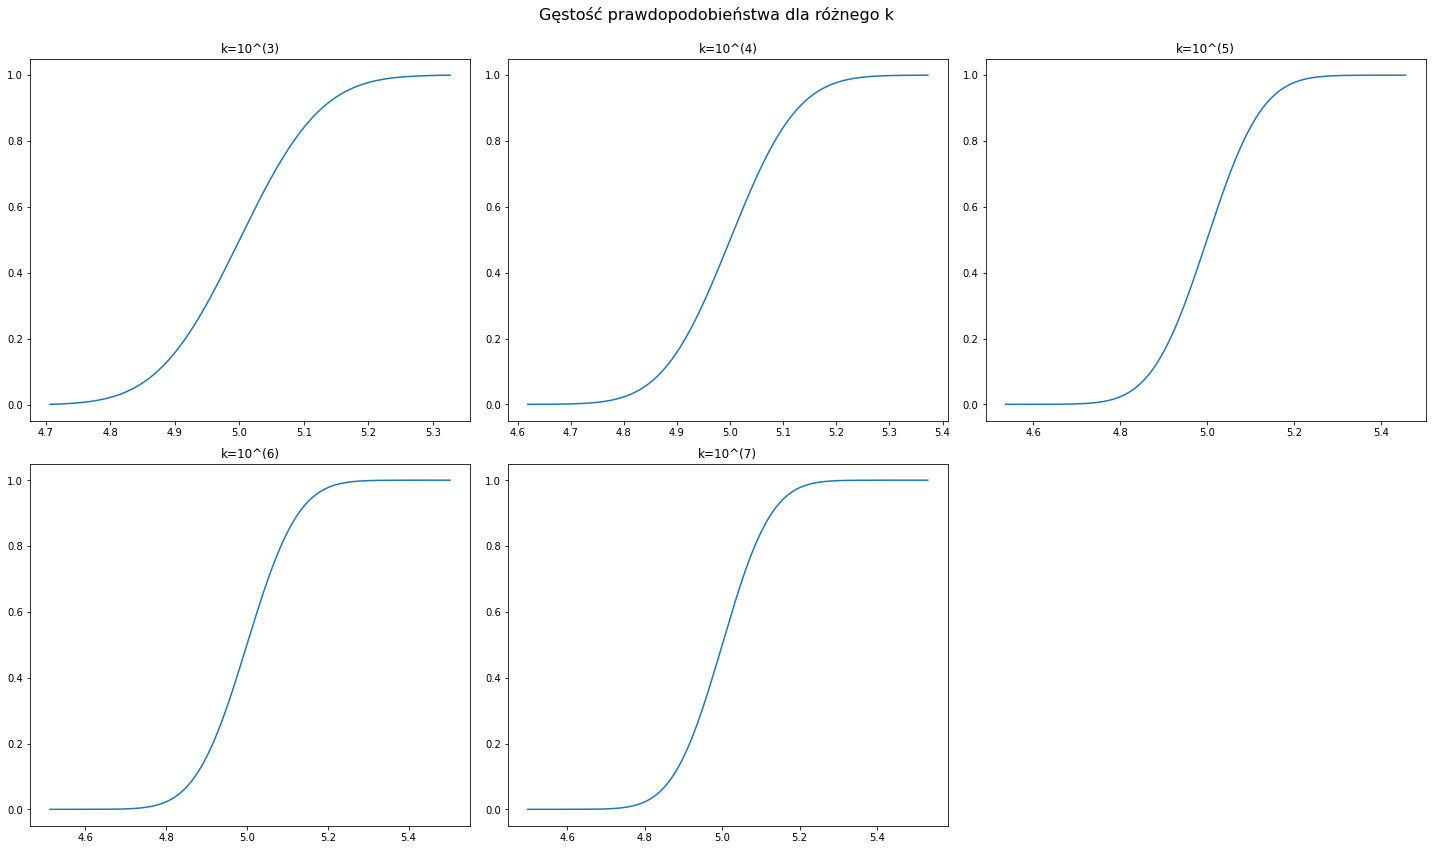

In [80]:
fig, axarr = plt.subplots(2, 3)
fig.set_figheight(12)
fig.set_figwidth(20)
fig.suptitle("Gęstość prawdopodobieństwa dla różnego k", fontsize=16)

axarr[0, 0].plot(np.sort(samples_k_3), norm_cdf(samples_k_3))
axarr[0, 0].set_title('k=10^(3)')
axarr[0, 1].plot(np.sort(samples_k_4), norm_cdf(samples_k_4))
axarr[0, 1].set_title('k=10^(4)')
axarr[0, 2].plot(np.sort(samples_k_5), norm_cdf(samples_k_5))
axarr[0, 2].set_title('k=10^(5)')
axarr[1, 0].plot(np.sort(samples_k_6), norm_cdf(samples_k_6))
axarr[1, 0].set_title('k=10^(6)')
axarr[1, 1].plot(np.sort(samples_k_7), norm_cdf(samples_k_7))
axarr[1, 1].set_title('k=10^(7)')
axarr[1, 2].set_visible(False)

# Tight layout often produces nice results
# but requires the title to be spaced accordingly
fig.tight_layout()
fig.subplots_adjust(top=0.92)

plt.show()

### Obliczenie wartości oczekiwanej

<b>Wartość oczekiwana</b> - (ang. expected value) to średnia wartość zmiennej losowej X. Można ją wyznaczyć przez pomnożenie każdej wartości zmiennej losowej przez jej prawdopodobieństwo i zsumowanie tych wartości. Wartość oczekiwana jest jednym z najważniejszych parametrów opisujących zmienną losową, ponieważ pozwala na określenie, jakiej wartości można oczekiwać, gdy zmienna losowa zostanie wielokrotnie pomierzona.

$$ E(X) = \int_{-\infty}^{\infty} x f(x) dx $$

Wytłumaczone na filmiku jak w pythonie obliczać wartość oczekiwaną oraz wariancję
https://www.youtube.com/watch?v=ikcUBqELZVU

In [81]:
#Dla k=10^(3)
expected_value_k1 = describe(samples_k_3).mean
#Dla k=10^(4)
expected_value_k2 = describe(samples_k_4).mean
#Dla k=10^(5)
expected_value_k3 = describe(samples_k_5).mean
#Dla k=10^(6)
expected_value_k4 = describe(samples_k_6).mean
#Dla k=10^(7)
expected_value_k5 = describe(samples_k_7).mean

### Obliczenie wariancji

<b>Wariancja</b> - w procesach stochastycznych to miara zmienności losowej zmiennej w czasie. Jest to średnia arytmetyczna kwadratów odchyleń wartości losowej zmiennej od jej wartości oczekiwanej w ciągu określonego czasu. Innymi słowy, wariancja procesu stochastycznego mierzy, jak bardzo zmieniają się wartości zmiennej losowej w czasie, i określa, jak bardzo trajektoria procesu różni się od średniej trajektorii. Im większa wariancja, tym większa zmienność w trajektorii procesu, a tym samym większa szansa na wystąpienie dużych odchyleń od wartości oczekiwanej. Wariancja jest jednym z podstawowych parametrów charakteryzujących proces stochastyczny i jest istotnym narzędziem w analizie i modelowaniu procesów losowych. W praktyce, często używa się także odchylenia standardowego, które jest pierwiastkiem kwadratowym z wariancji i wyraża się w tych samych jednostkach co zmienna losowa.


$$ \operatorname{Var}(X) = E\left[(X - E(X))^2\right] = \int_{-\infty}^{\infty} (x - E(X))^2 f(x) dx $$

In [82]:
#Dla k=10^(3)
variance_k1 = describe(samples_k_3).variance
#Dla k=10^(4)
variance_k2 = describe(samples_k_4).variance
#Dla k=10^(5)
variance_k3 = describe(samples_k_5).variance
#Dla k=10^(6)
variance_k4 = describe(samples_k_6).variance
#Dla k=10^(7)
variance_k5 = describe(samples_k_7).variance

Podsumowanie obliczeń wartości oczekiwanej oraz kowariancji względem różnych k

In [83]:
dict = {'k' : ['k^(3)', 'k^(4)', 'k^(5)', 'k^(6)', 'k^(7)'],
        'wartość oczekiwana' : [expected_value_k1, expected_value_k2, expected_value_k3, expected_value_k4, expected_value_k5],
        'wariancja' : [variance_k1, variance_k2, variance_k3, variance_k4, variance_k5]}

df = pd.DataFrame(dict)

df.style

,k,wartość oczekiwana,wariancja
0,k^(3),4.996969,0.009650
1,k^(4),5.002069,0.010072
2,k^(5),4.999625,0.010067
3,k^(6),5.000079,0.009985
4,k^(7),5.000041,0.009997


### Obliczenie funkcji kowariancyjnej

<b>Funkcja kowariancyjna</b> - (ang. covariance function) to funkcja, która opisuje zależność między dwiema zmiennymi losowymi X i Y. Funkcja kowariancyjna określa, czy zmienne losowe X i Y są skorelowane (czy zmieniają się razem) lub niezależne (czy zmieniają się niezależnie od siebie). W przypadku zmiennych losowych niezależnych funkcja kowariancyjna wynosi 0, a w przypadku zmiennych losowych skorelowanych funkcja kowariancyjna może być dodatnia lub ujemna.

$$ \operatorname{Cov}(X_i, X_j) = \begin{cases} \sigma^2 & i = j \\ 0 & i \neq j \end{cases} $$

gdzie X_i i X_j to próbki szumu białego, a σ^2 to wariancja szumu białego.

In [84]:
def covariance(samples, k):
    # Subtitute DC component noise signal from samples
    subtitute_mu_value = samples - mu
    # Compute covariance function
    cov = np.correlate(subtitute_mu_value, subtitute_mu_value, mode='full') / k
    return cov

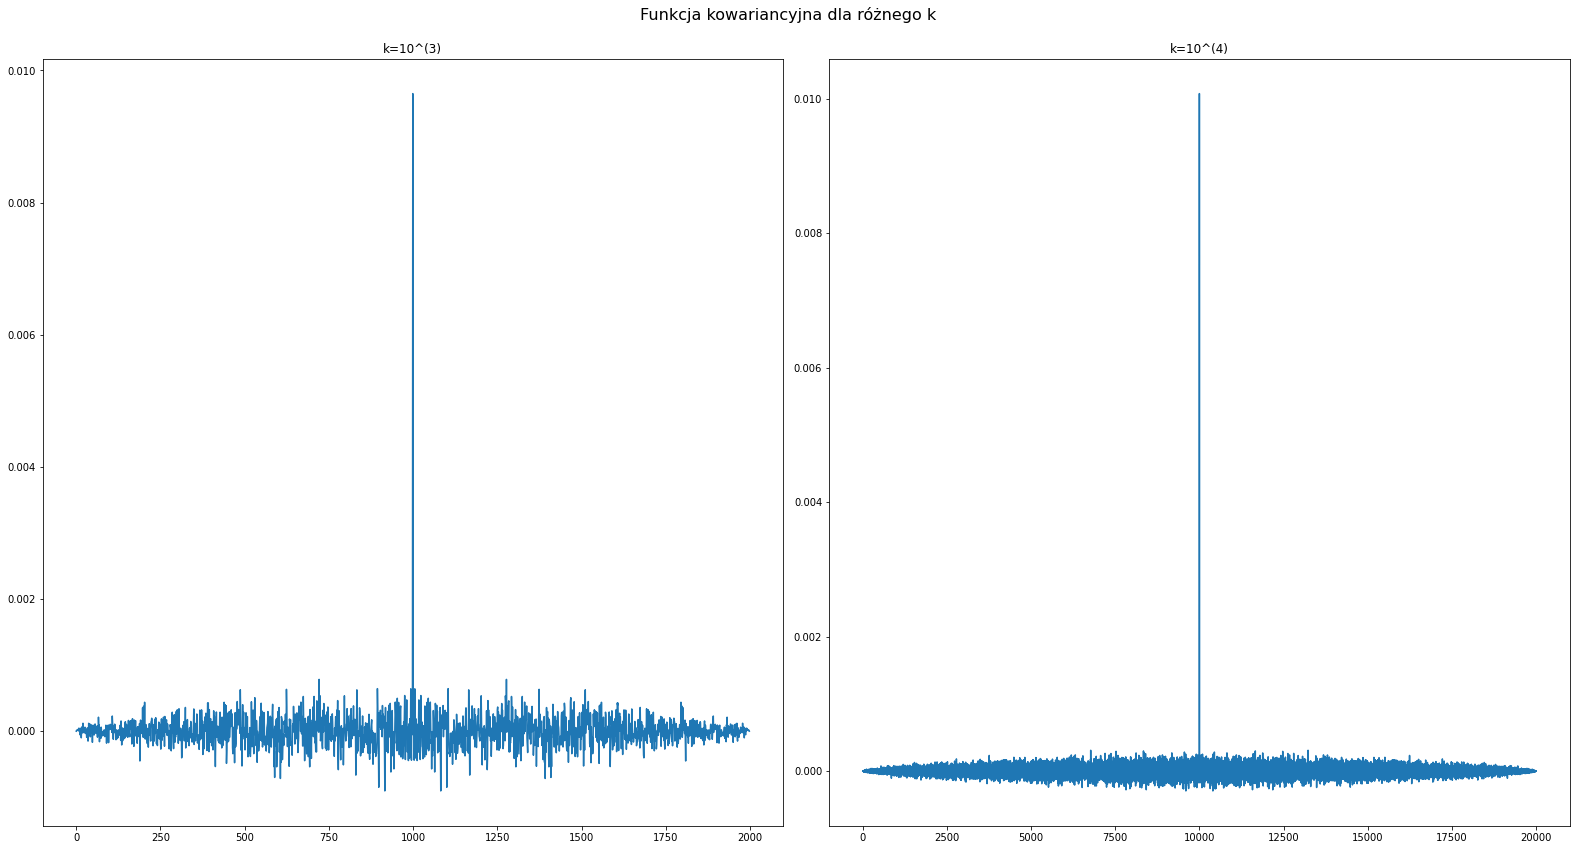

In [85]:
fig, axarr = plt.subplots(1, 2)
fig.set_figheight(12)
fig.set_figwidth(22)
fig.suptitle("Funkcja kowariancyjna dla różnego k", fontsize=16)

axarr[0].plot(covariance(samples_k_3, k_3))
axarr[0].set_title('k=10^(3)')
axarr[1].plot(covariance(samples_k_4, k_4))
axarr[1].set_title('k=10^(4)')

# Tight layout often produces nice results
# but requires the title to be spaced accordingly
fig.tight_layout()
fig.subplots_adjust(top=0.92)

plt.show()

## 3. Przeprowadzić filtrację danych z wykorzystaniem filtru dolnoprzepustowego FIR (SOJ) o różnych parametrach

In [86]:
def calculate_impulse_response(numtaps, filter):
    # Tworzenie impulsu jednostkowego
    impulse = np.zeros(numtaps)
    impulse[numtaps // 2] = 1
    
    # Obliczanie odpowiedzi impulsowej filtru FIR
    impulse_response = signal.convolve(impulse, filter, mode='full')
    
    return impulse_response

def filtration(noise, cutoff_param):
    # definicja filtra dolnoprzepustowego FIR (SOJ) o różnych parametrach
    fs = 5000  # częstotliwość próbkowania 5 kHz
    filter1 = signal.firwin(numtaps=11, cutoff=cutoff_param, fs=fs, window='hamming')
    filter2 = signal.firwin(numtaps=31, cutoff=cutoff_param, fs=fs, window='hamming')
    filter3 = signal.firwin(numtaps=51, cutoff=cutoff_param, fs=fs, window='hamming')

    # przeprowadzenie filtracji danych z wykorzystaniem filtrów
    filtered1 = signal.convolve(noise, filter1, mode='same')
    filtered2 = signal.convolve(noise, filter2, mode='same')
    filtered3 = signal.convolve(noise, filter3, mode='same')

    fig, axs = plt.subplots(3, 2, figsize=(15, 8))

    axs[0, 0].plot(noise, label='Szum biały')
    axs[0, 0].plot(filtered1, label='Filtr dolnoprzepustowy FIR (SOJ) o 11 punktach')
    axs[0, 0].set_title("Filtracja filtrem dolnoprzepustowym FIR (SOJ) o 11 punktach")
    axs[0, 0].legend()

    axs[1, 0].plot(noise, label='Szum biały')
    axs[1, 0].plot(filtered2, label='Filtr dolnoprzepustowy FIR (SOJ) o 31 punktach')
    axs[1, 0].set_title("Filtracja filtrem dolnoprzepustowym FIR (SOJ) o 31 punktach")
    axs[1, 0].legend()

    axs[2, 0].plot(noise, label='Szum biały')
    axs[2, 0].plot(filtered3, label='Filtr dolnoprzepustowy FIR (SOJ) o 51 punktach')
    axs[2, 0].set_title("Filtracja filtrem dolnoprzepustowym FIR (SOJ) o 51 punktach")
    axs[2, 0].legend()
    
    impulse_response1 = calculate_impulse_response(11, filter1)
    axs[0, 1].stem(impulse_response1)
    axs[0, 1].set_title("Odpowiedź impulsowa filtru FIR (SOJ) o 11 punktach")
    
    impulse_response2 = calculate_impulse_response(31, filter2)
    axs[1, 1].stem(impulse_response2)
    axs[1, 1].set_title("Odpowiedź impulsowa filtru FIR (SOJ) o 31 punktach")
    
    impulse_response3 = calculate_impulse_response(51, filter3)
    axs[2, 1].stem(impulse_response3)
    axs[2, 1].set_title("Odpowiedź impulsowa filtru FIR (SOJ) o 51 punktach")
    
    fig.tight_layout()
    
    plt.show()

    return filtered3

### Dla k=10^(3)

#### fcutoff=300Hz

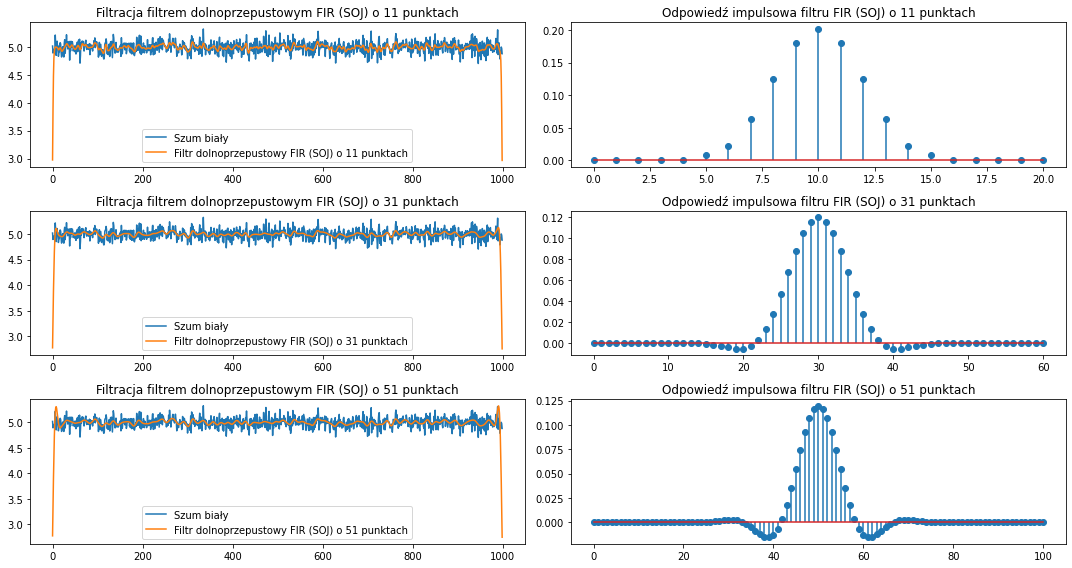

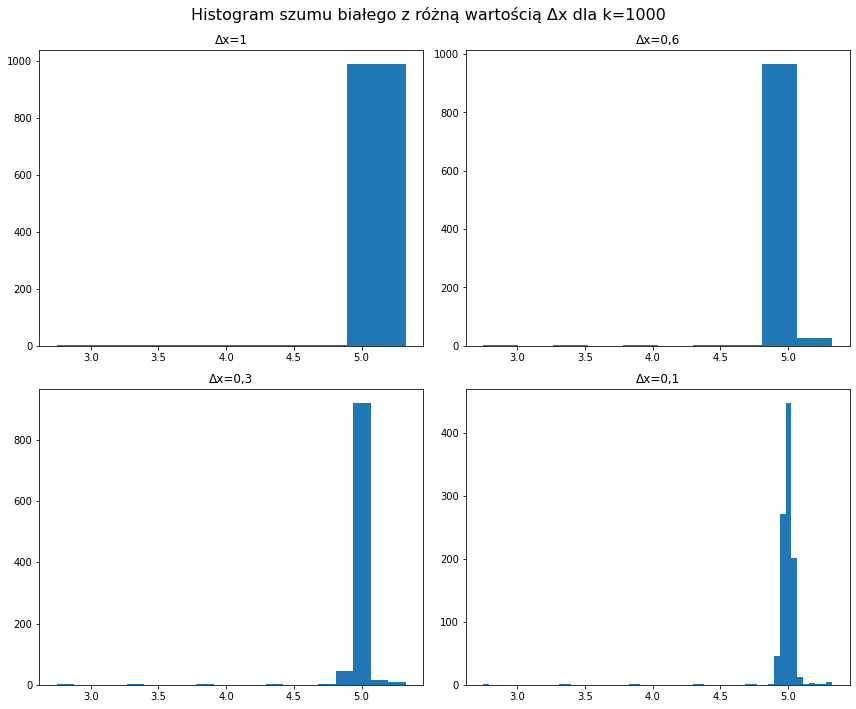

In [87]:
noise_after_filtration_k3_fc300 = filtration(samples_k_3, 300)
display_hist(noise_after_filtration_k3_fc300, k_3)

#### fcutoff=900Hz

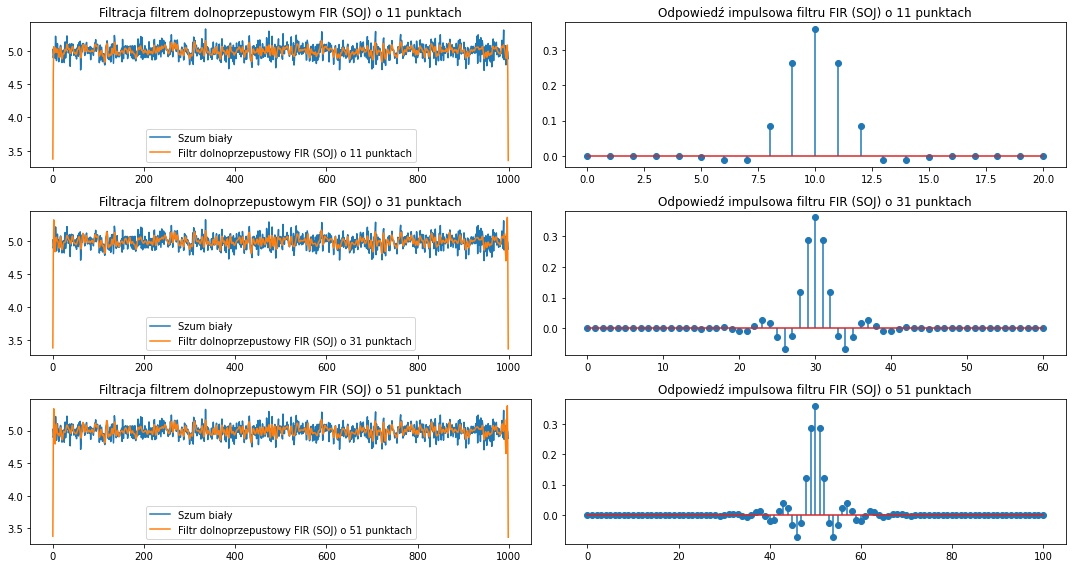

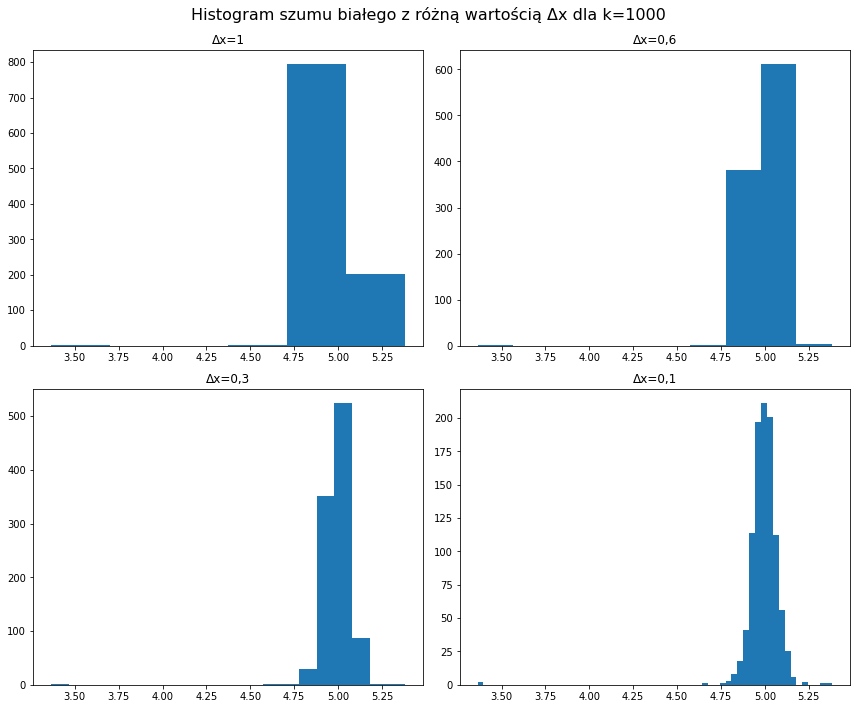

In [88]:
noise_after_filtration_k3_fc900 = filtration(samples_k_3, 900)
display_hist(noise_after_filtration_k3_fc900, k_3)

#### fcutoff=1600Hz

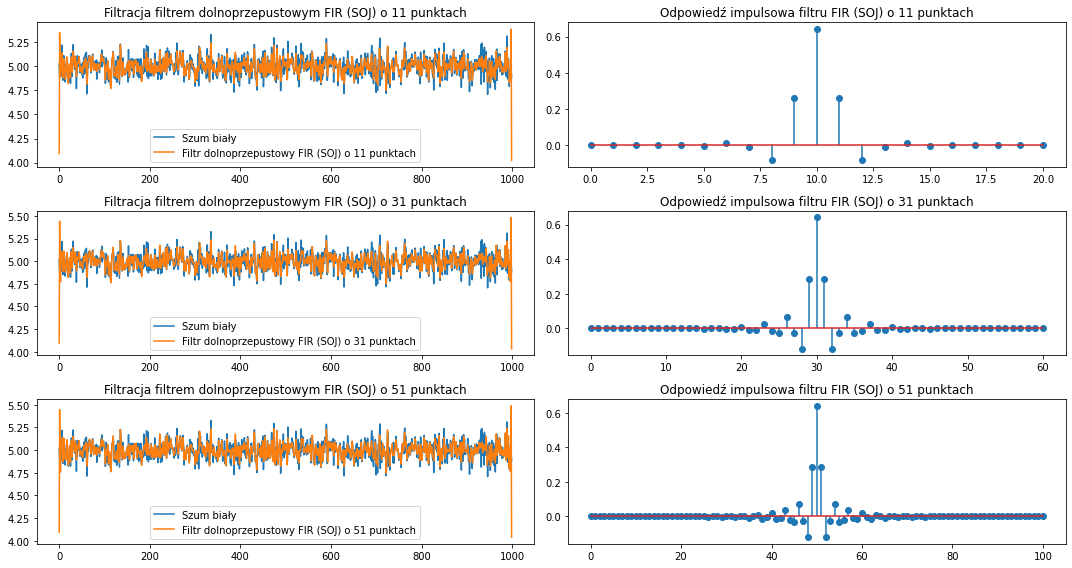

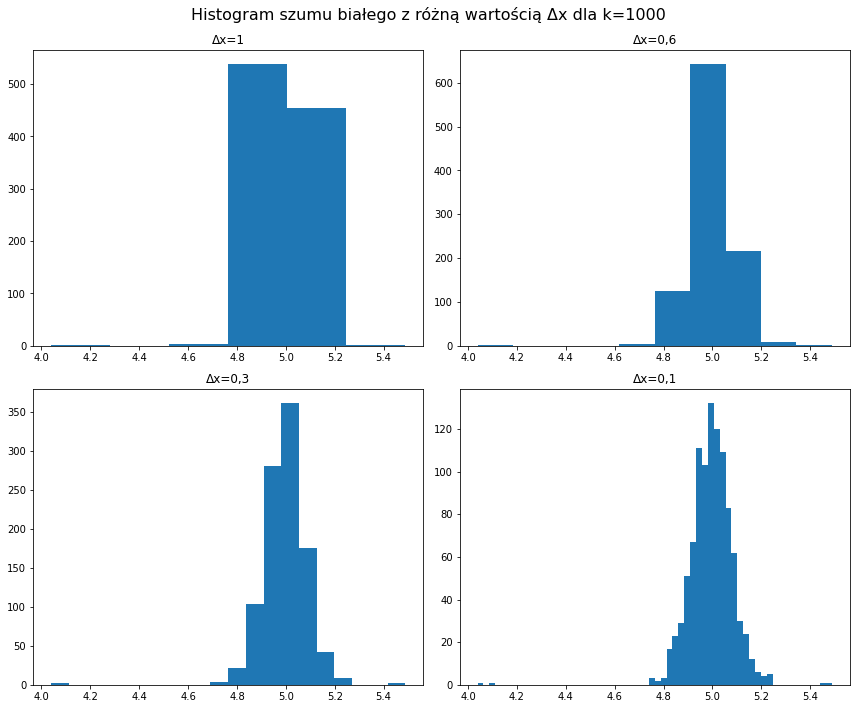

In [89]:
noise_after_filtration_k3_fc1600 = filtration(samples_k_3, 1600)
display_hist(noise_after_filtration_k3_fc1600, k_3)

### Dla k=10^(4)

#### fcutoff=300

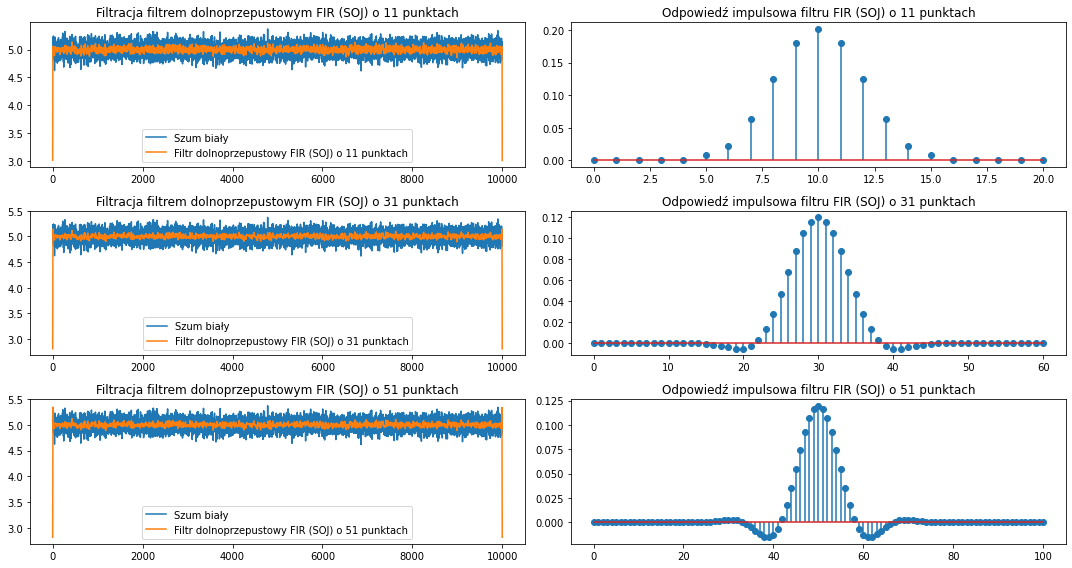

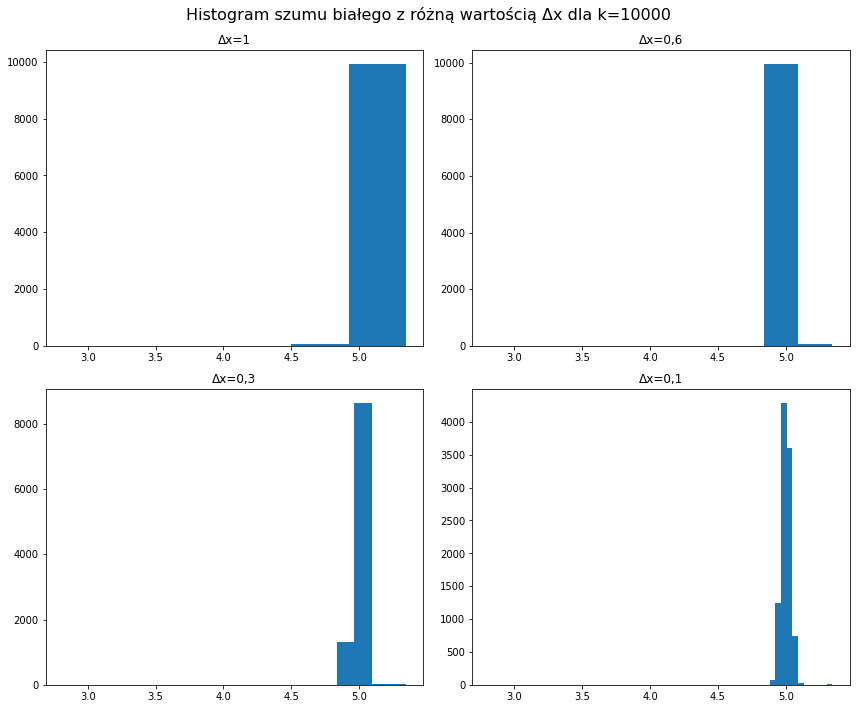

In [90]:
noise_after_filtration_k4_fc300 = filtration(samples_k_4, 300)
display_hist(noise_after_filtration_k4_fc300, k_4)

#### fcutoff=900

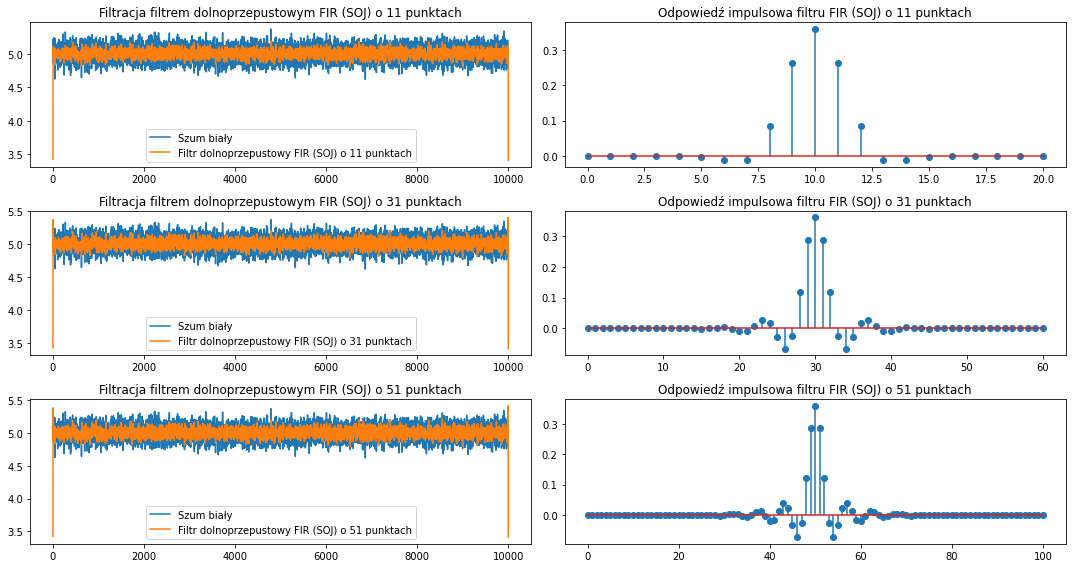

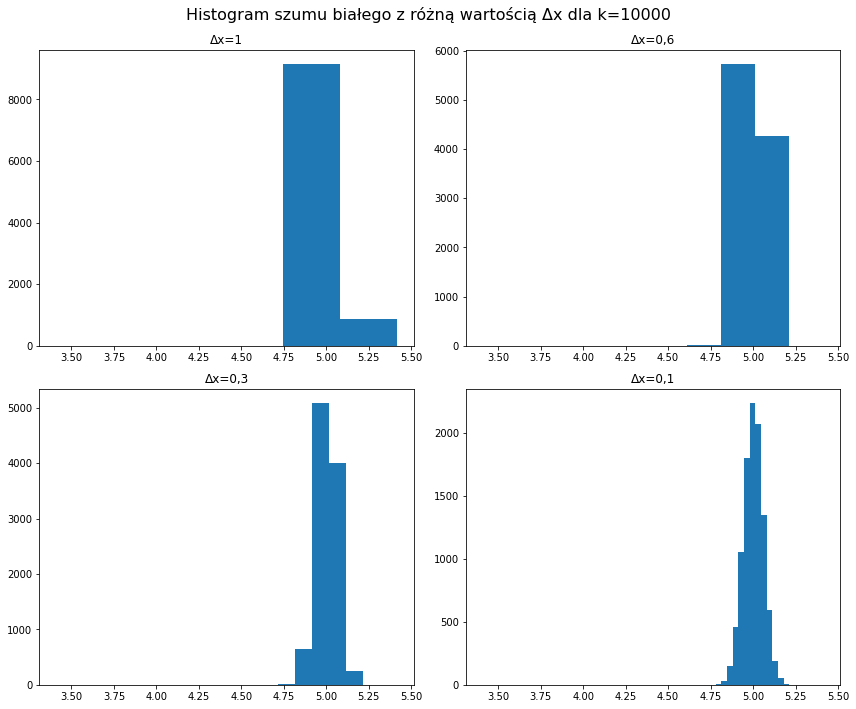

In [91]:
noise_after_filtration_k4_fc900 = filtration(samples_k_4, 900)
display_hist(noise_after_filtration_k4_fc900, k_4)

#### fcutoff=1600

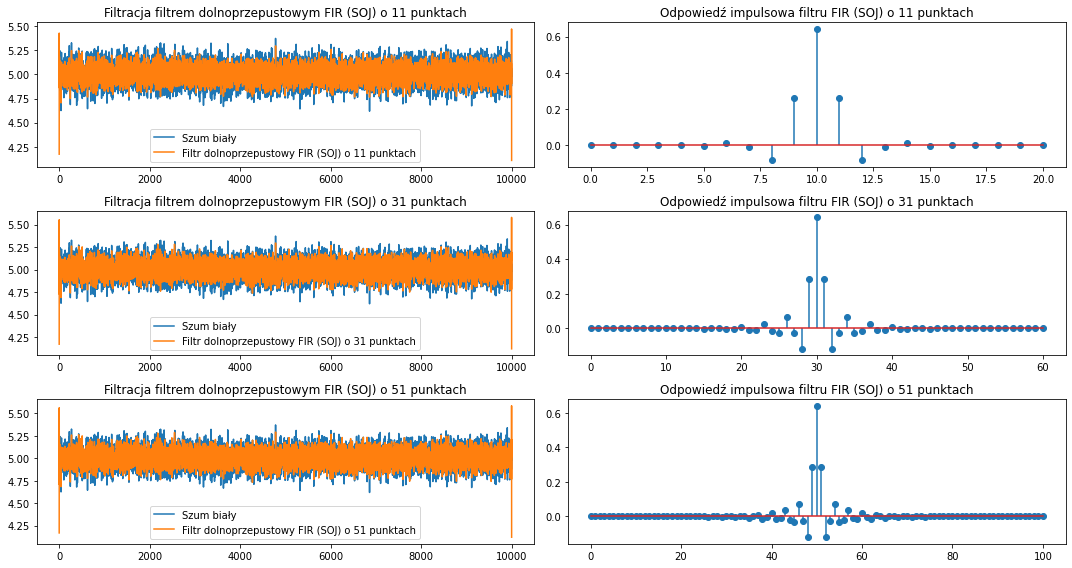

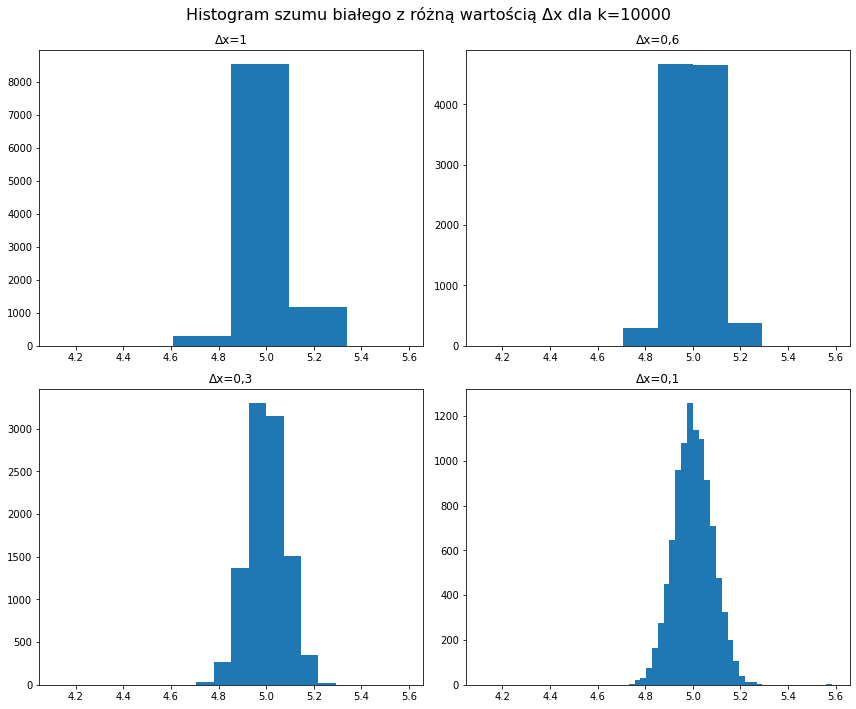

In [92]:
noise_after_filtration_k4_fc1600 = filtration(samples_k_4, 1600)
display_hist(noise_after_filtration_k4_fc1600, k_4)

### Dla k=10^(5)

#### fcutoff=300

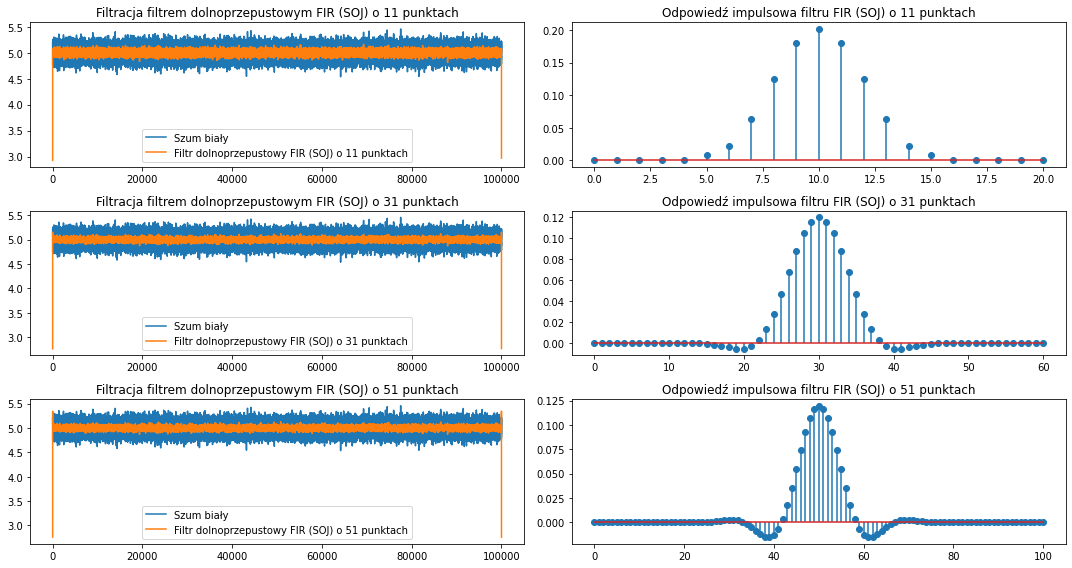

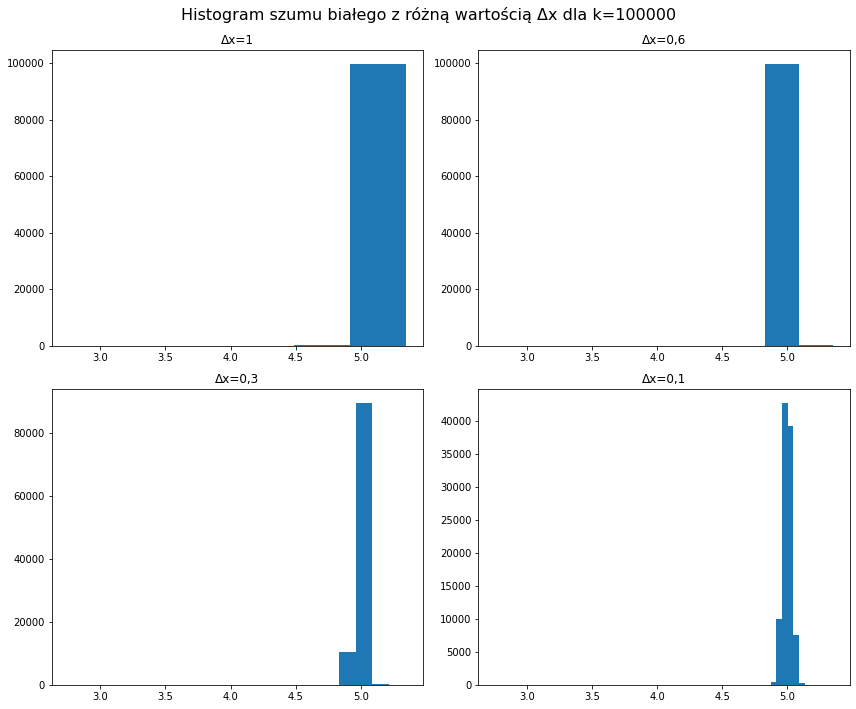

In [93]:
noise_after_filtration_k5_fc300 = filtration(samples_k_5, 300)
display_hist(noise_after_filtration_k5_fc300, k_5)

#### fcutoff=900

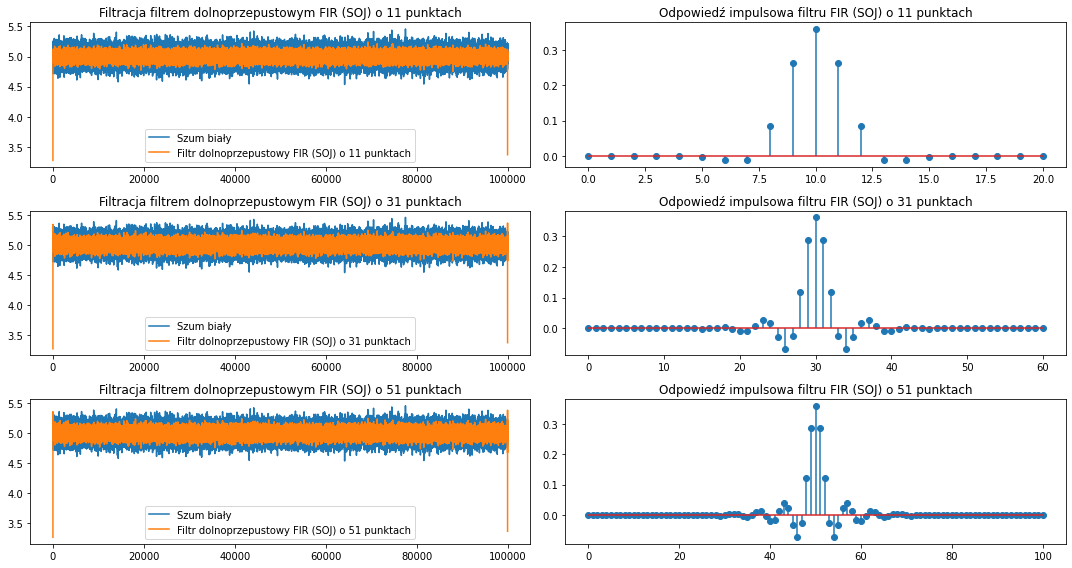

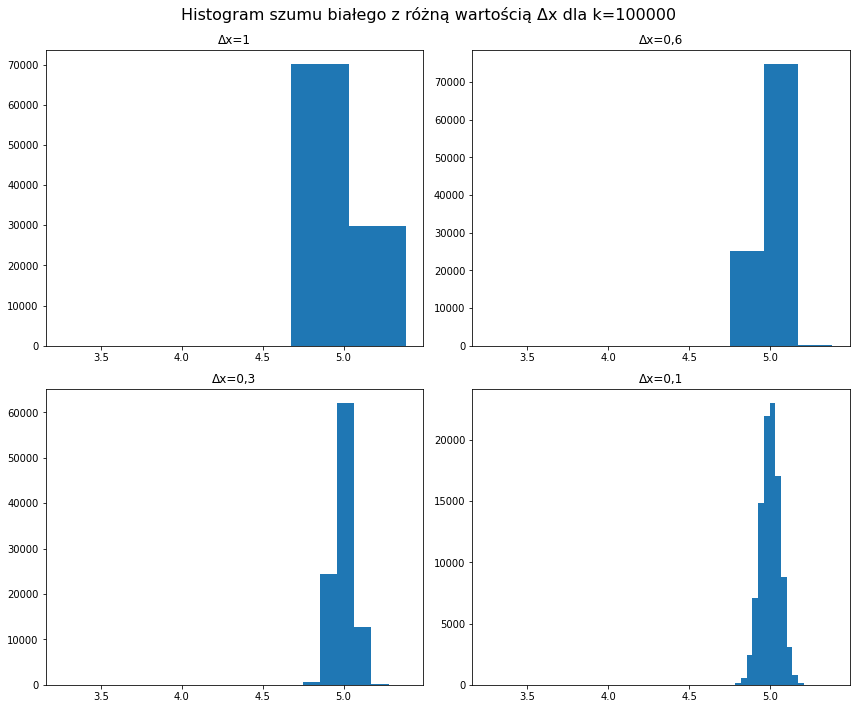

In [94]:
noise_after_filtration_k5_fc900 = filtration(samples_k_5, 900)
display_hist(noise_after_filtration_k5_fc900, k_5)

#### fcutoff=1600

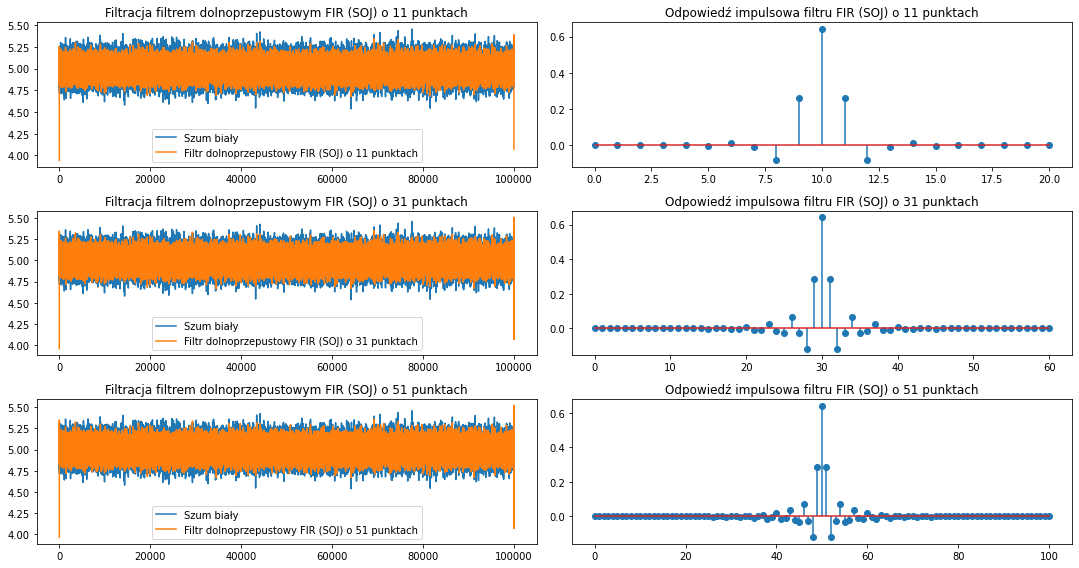

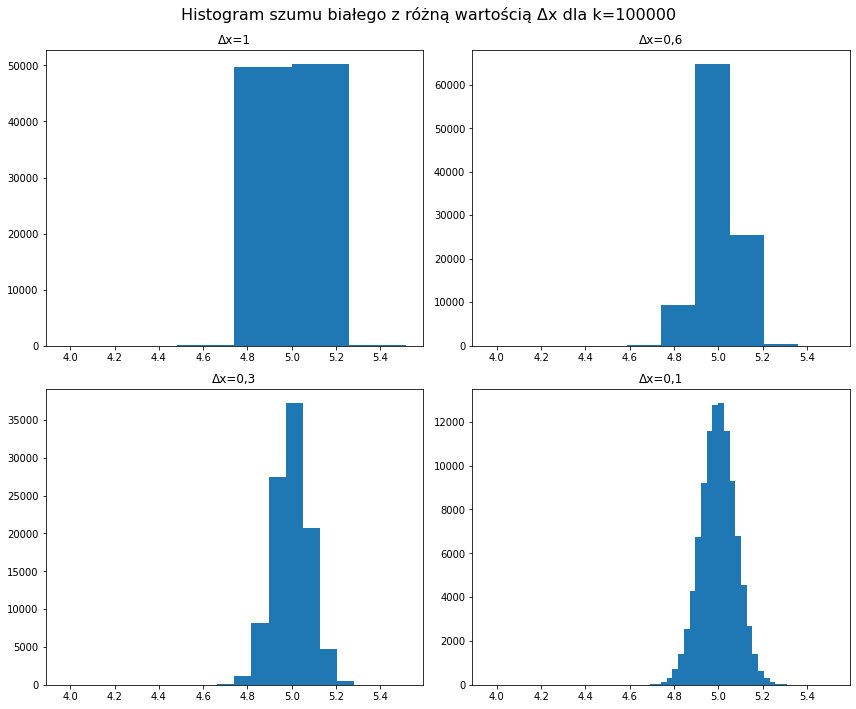

In [95]:
noise_after_filtration_k5_fc1600 = filtration(samples_k_5, 1600)
display_hist(noise_after_filtration_k5_fc1600, k_5)

### Dla k=10^(6)

#### fcutoff=300

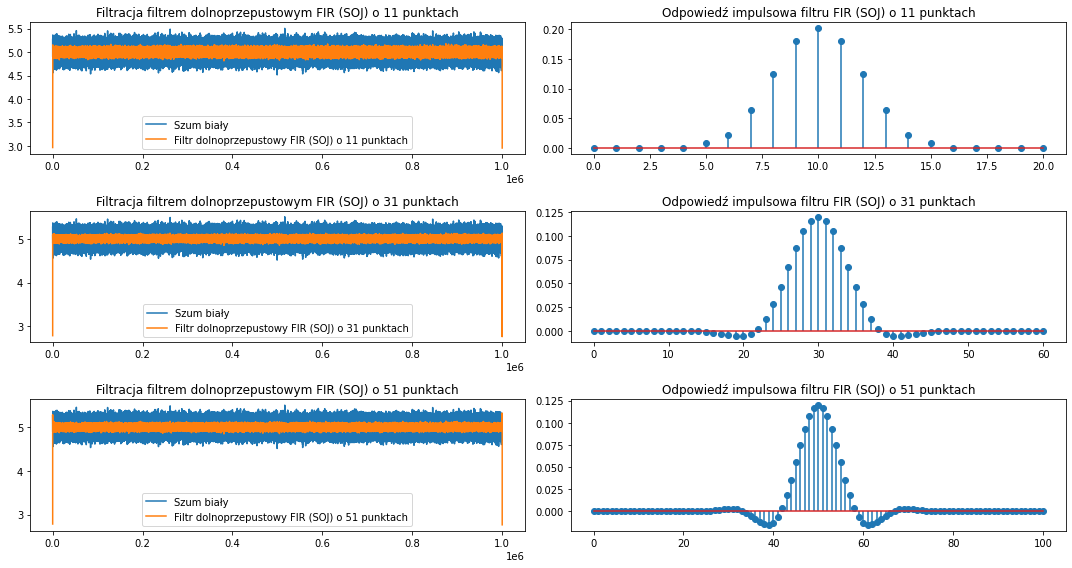

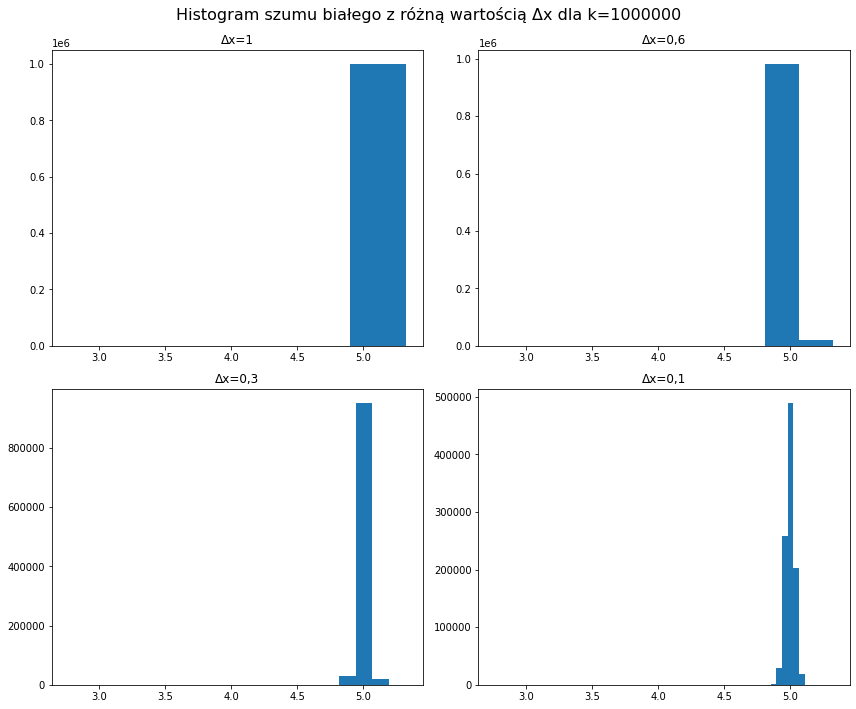

In [96]:
noise_after_filtration_k6_fc300 = filtration(samples_k_6, 300)
display_hist(noise_after_filtration_k6_fc300, k_6)

#### fcutoff=900

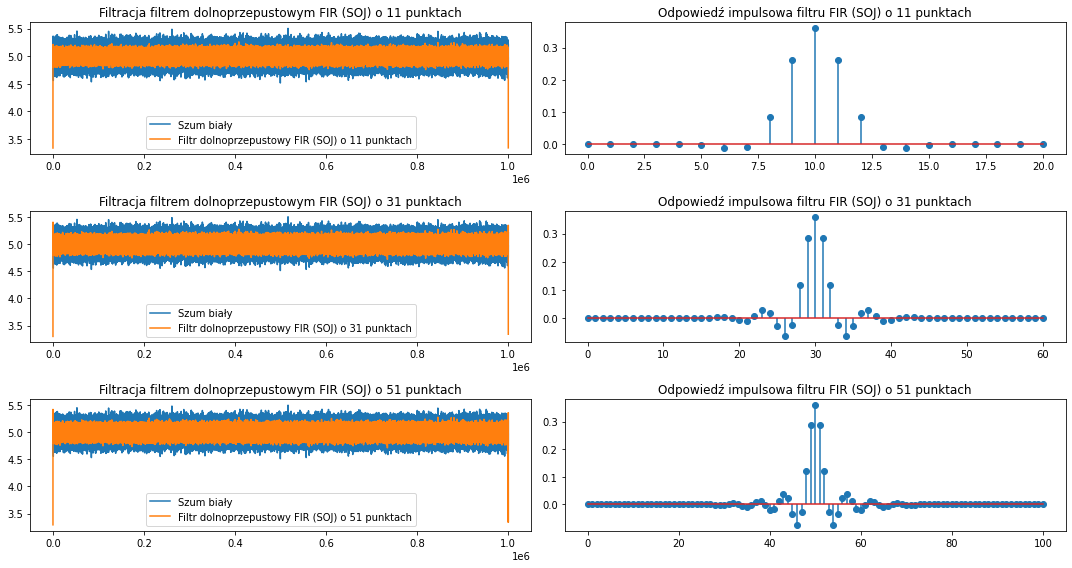

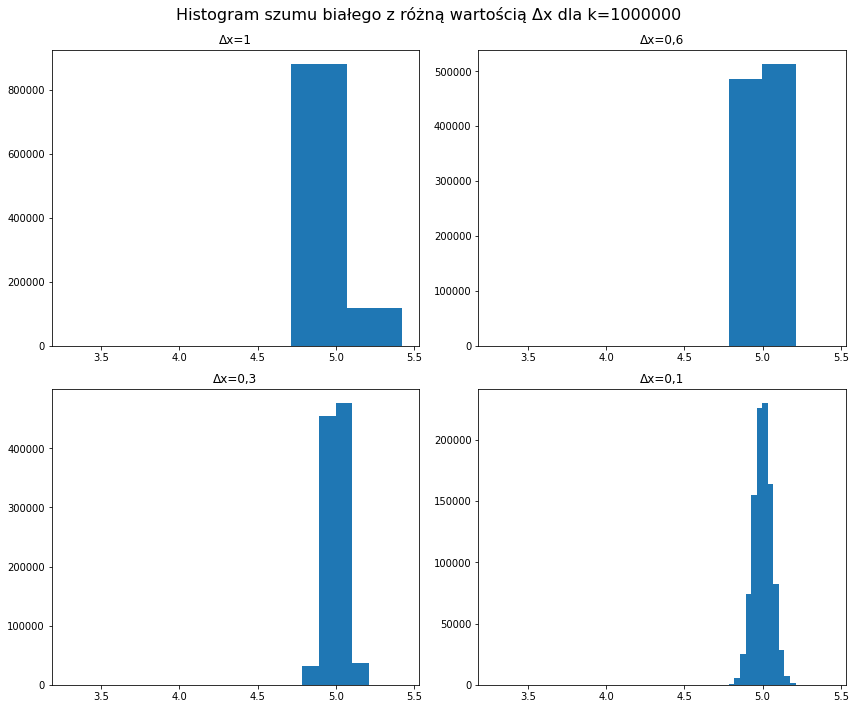

In [97]:
noise_after_filtration_k6_fc900 = filtration(samples_k_6, 900)
display_hist(noise_after_filtration_k6_fc900, k_6)

#### fcutoff=1600

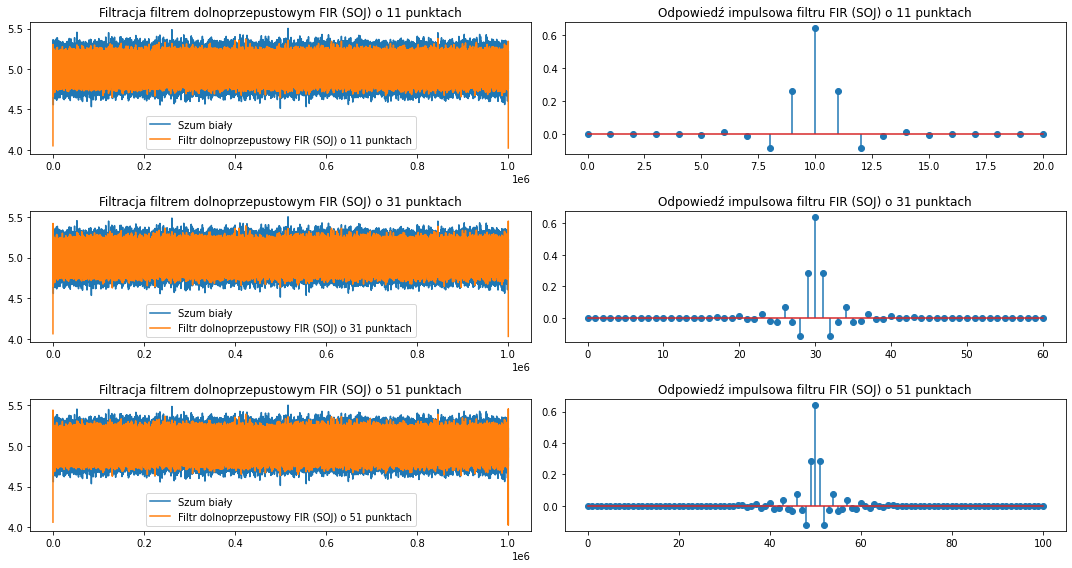

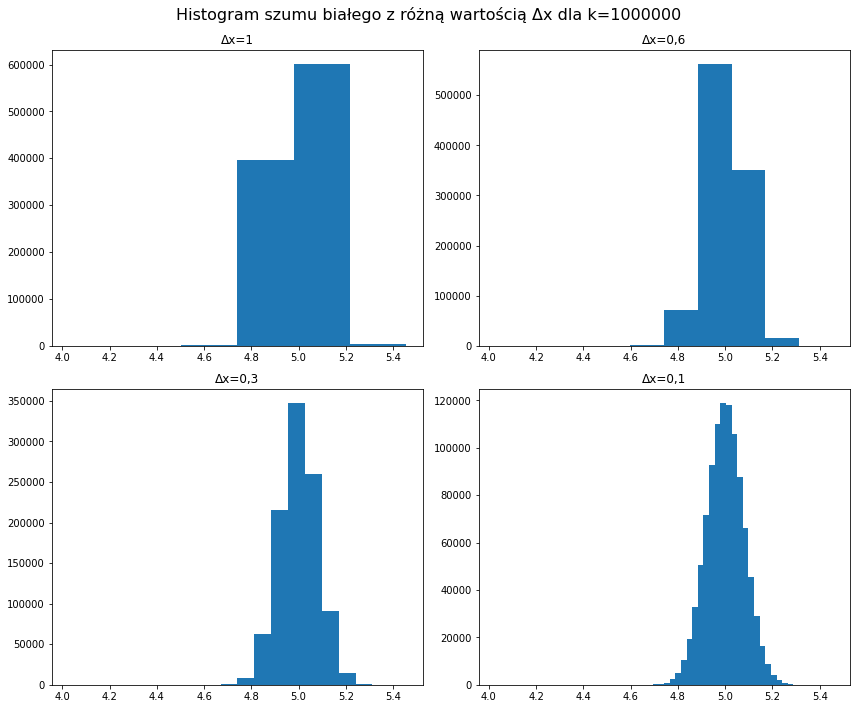

In [98]:
noise_after_filtration_k6_fc1600 = filtration(samples_k_6, 1600)
display_hist(noise_after_filtration_k6_fc1600, k_6)

#### Dla k=10^(7)

#### fcutoff=300

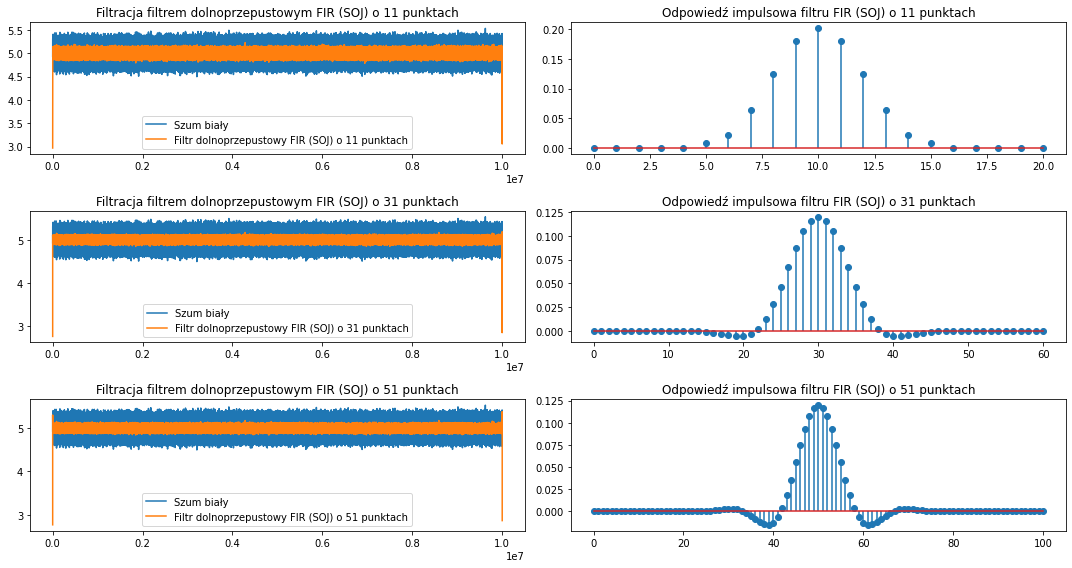

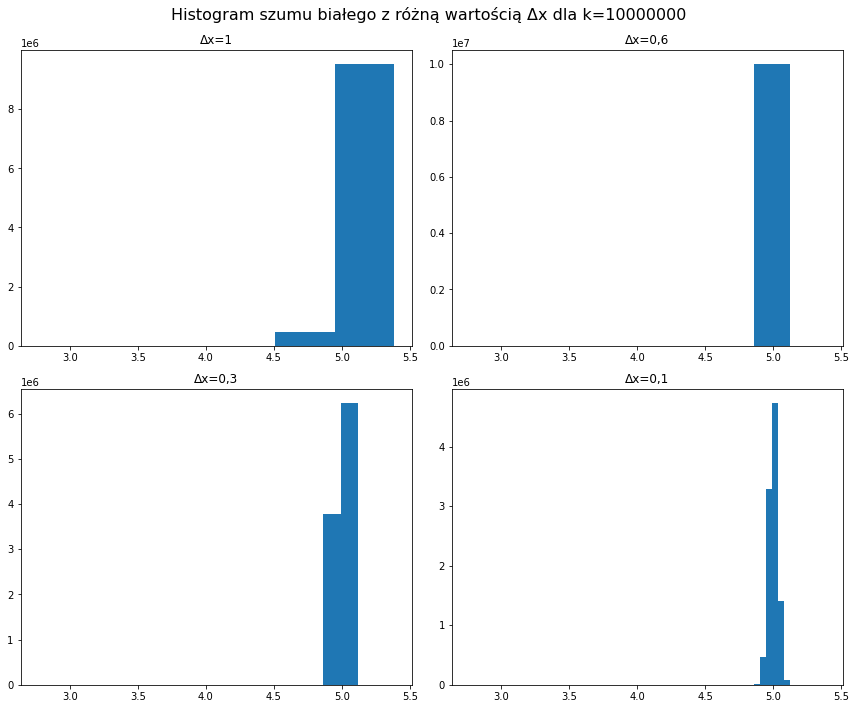

In [99]:
noise_after_filtration_k7_fc300 = filtration(samples_k_7, 300)
display_hist(noise_after_filtration_k7_fc300, k_7)

#### fcutoff=900

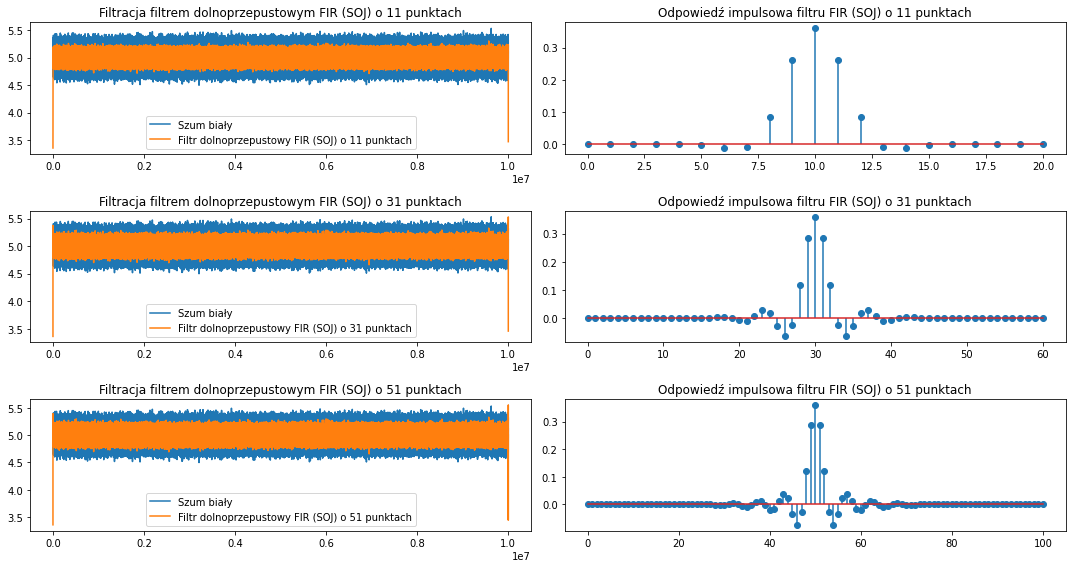

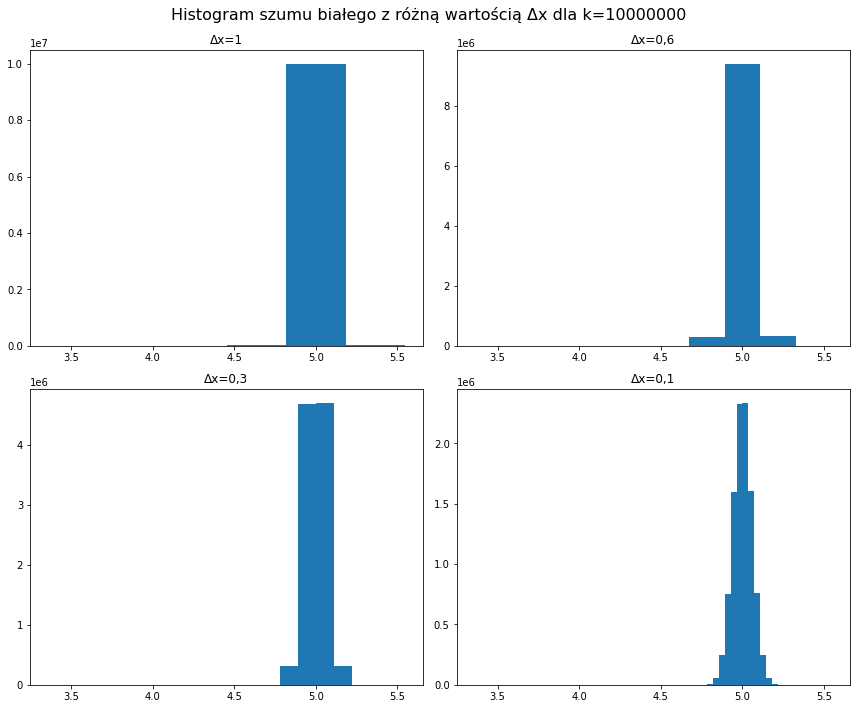

In [100]:
noise_after_filtration_k7_fc900 = filtration(samples_k_7, 900)
display_hist(noise_after_filtration_k7_fc900, k_7)

#### fcutoff=1600

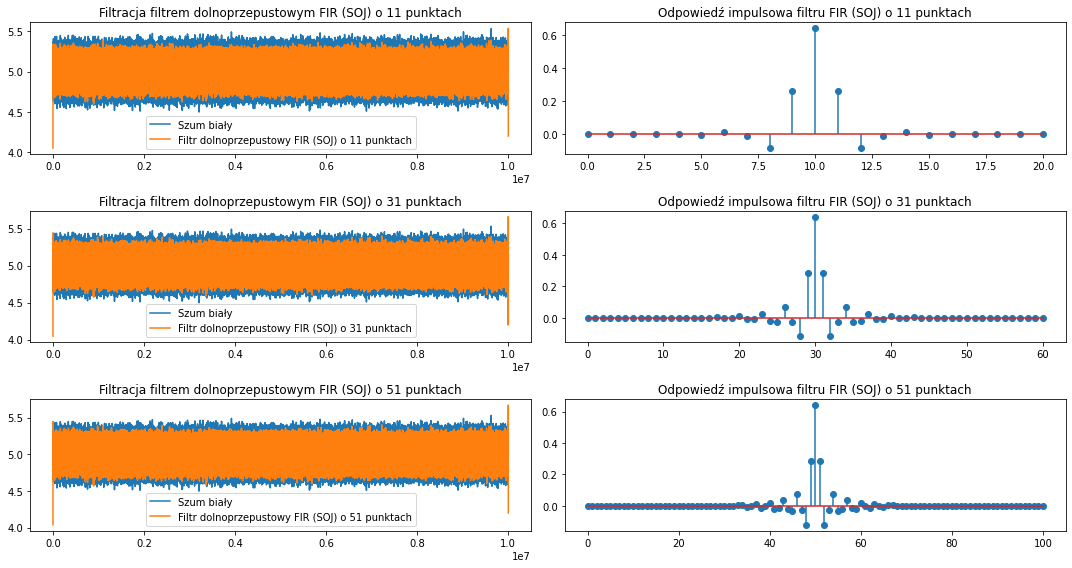

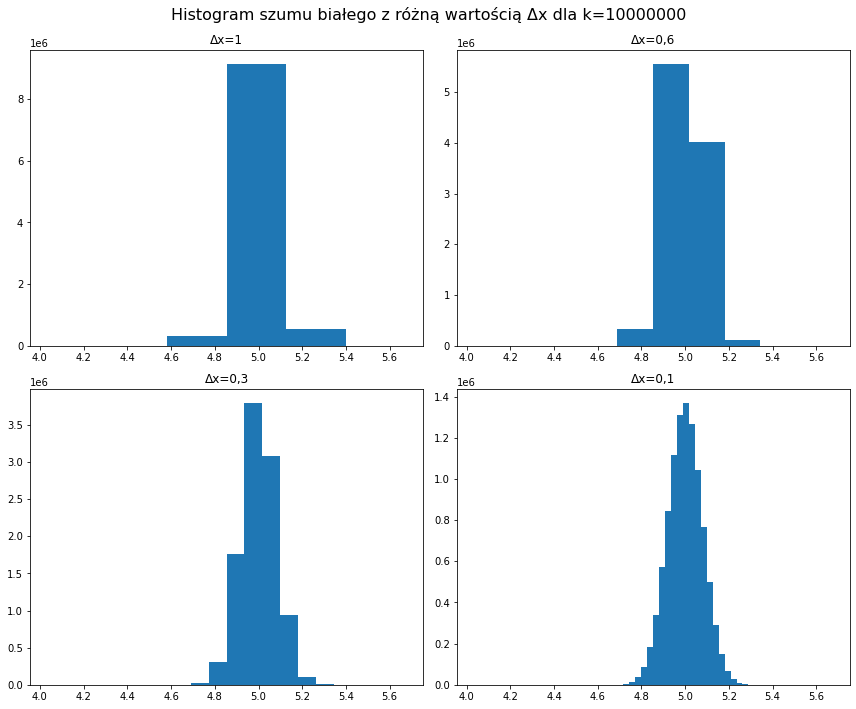

In [101]:
noise_after_filtration_k7_fc1600 = filtration(samples_k_7, 1600)
display_hist(noise_after_filtration_k7_fc1600, k_7)

## 4. Obliczyć gęstość prawdopodobieństwa, dystrybuantę, a też wartość oczekiwaną, wariancję i funkcję kowariancyjną sygnału wyjściowego. Porównać wyniki z p 2.

### Obliczenie gęstości prawdopodobieństwa

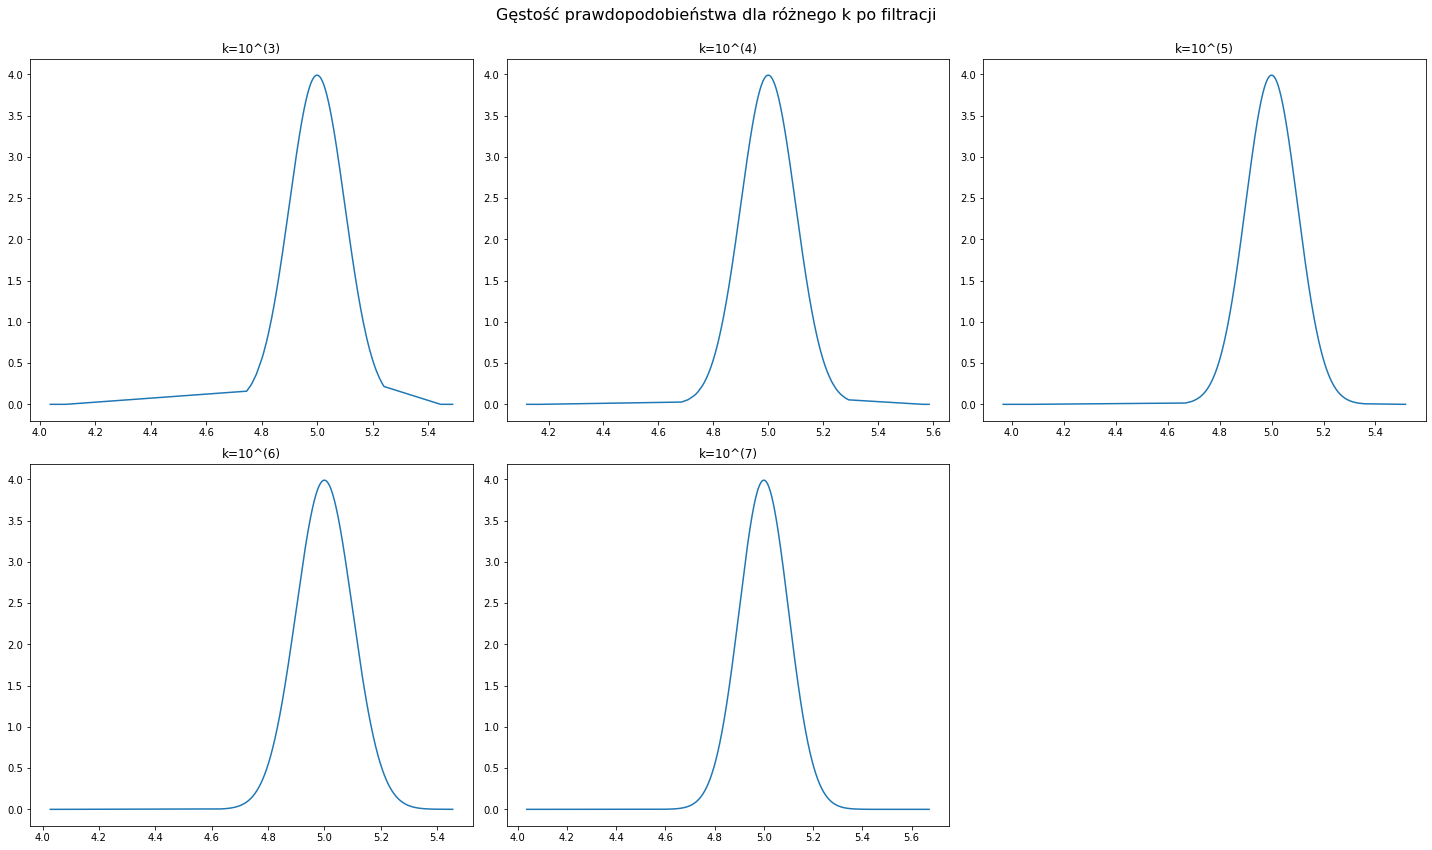

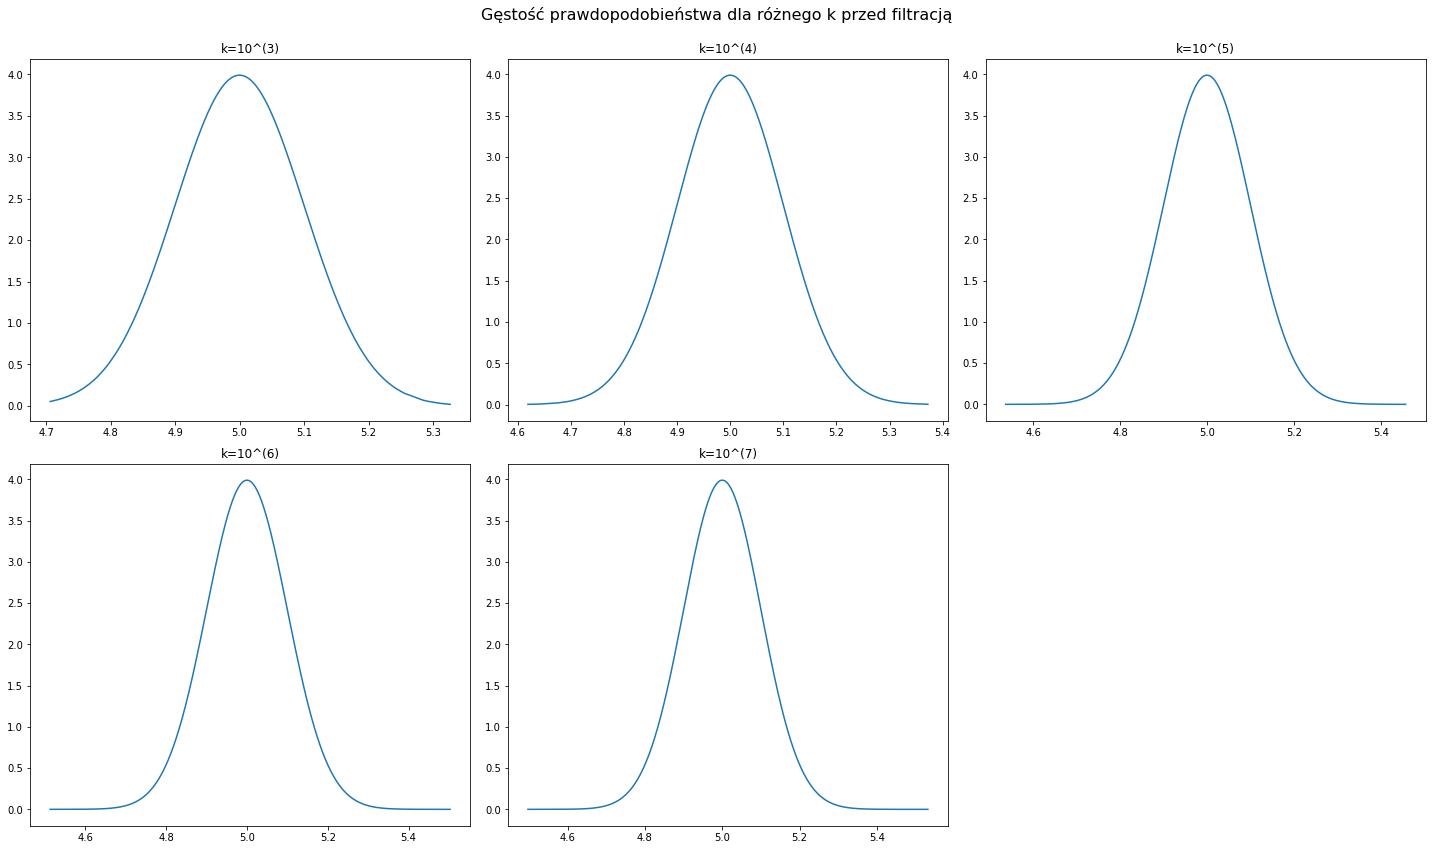

In [114]:
fig_1, axarr_1 = plt.subplots(2, 3)
fig_1.set_figheight(12)
fig_1.set_figwidth(20)
fig_1.suptitle("Gęstość prawdopodobieństwa dla różnego k po filtracji", fontsize=16)

axarr_1[0, 0].plot(np.sort(noise_after_filtration_k3_fc1600), probability_pdf(noise_after_filtration_k3_fc1600))
axarr_1[0, 0].set_title('k=10^(3)')
axarr_1[0, 1].plot(np.sort(noise_after_filtration_k4_fc1600), probability_pdf(noise_after_filtration_k4_fc1600))
axarr_1[0, 1].set_title('k=10^(4)')
axarr_1[0, 2].plot(np.sort(noise_after_filtration_k5_fc1600), probability_pdf(noise_after_filtration_k5_fc1600))
axarr_1[0, 2].set_title('k=10^(5)')
axarr_1[1, 0].plot(np.sort(noise_after_filtration_k6_fc1600), probability_pdf(noise_after_filtration_k6_fc1600))
axarr_1[1, 0].set_title('k=10^(6)')
axarr_1[1, 1].plot(np.sort(noise_after_filtration_k7_fc1600), probability_pdf(noise_after_filtration_k7_fc1600))
axarr_1[1, 1].set_title('k=10^(7)')
axarr_1[1, 2].set_visible(False)

# Tight layout often produces nice results
# but requires the title to be spaced accordingly
fig_1.tight_layout()
fig_1.subplots_adjust(top=0.92)

fig_2, axarr_2 = plt.subplots(2, 3)
fig_2.set_figheight(12)
fig_2.set_figwidth(20)
fig_2.suptitle("Gęstość prawdopodobieństwa dla różnego k przed filtracją", fontsize=16)

axarr_2[0, 0].plot(np.sort(samples_k_3), probability_pdf(samples_k_3))
axarr_2[0, 0].set_title('k=10^(3)')
axarr_2[0, 1].plot(np.sort(samples_k_4), probability_pdf(samples_k_4))
axarr_2[0, 1].set_title('k=10^(4)')
axarr_2[0, 2].plot(np.sort(samples_k_5), probability_pdf(samples_k_5))
axarr_2[0, 2].set_title('k=10^(5)')
axarr_2[1, 0].plot(np.sort(samples_k_6), probability_pdf(samples_k_6))
axarr_2[1, 0].set_title('k=10^(6)')
axarr_2[1, 1].plot(np.sort(samples_k_7), probability_pdf(samples_k_7))
axarr_2[1, 1].set_title('k=10^(7)')
axarr_2[1, 2].set_visible(False)

# Tight layout often produces nice results
# but requires the title to be spaced accordingly
fig_2.tight_layout()
fig_2.subplots_adjust(top=0.92)

plt.show()

### Obliczenie dystrybuanty

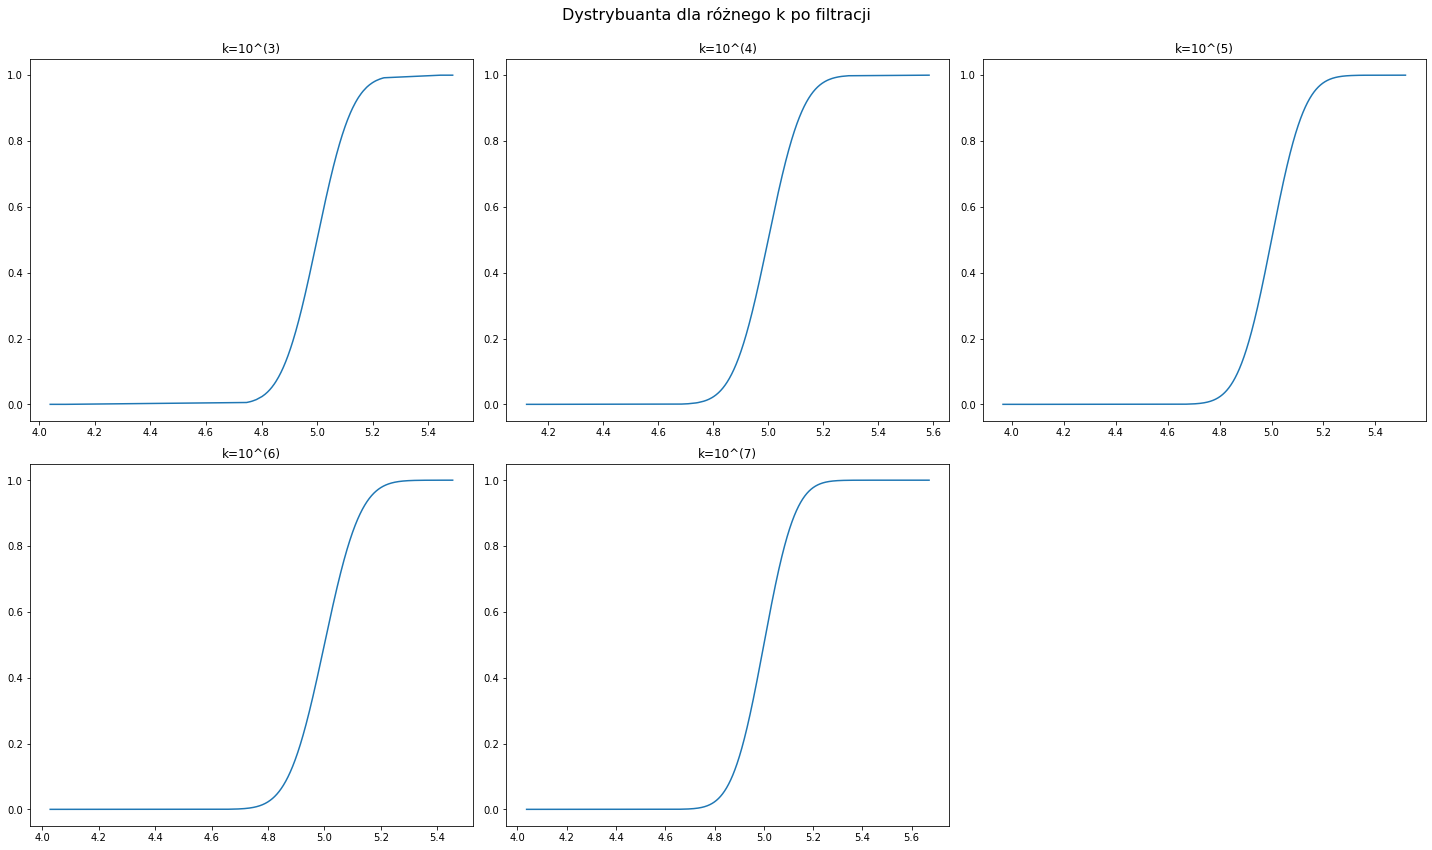

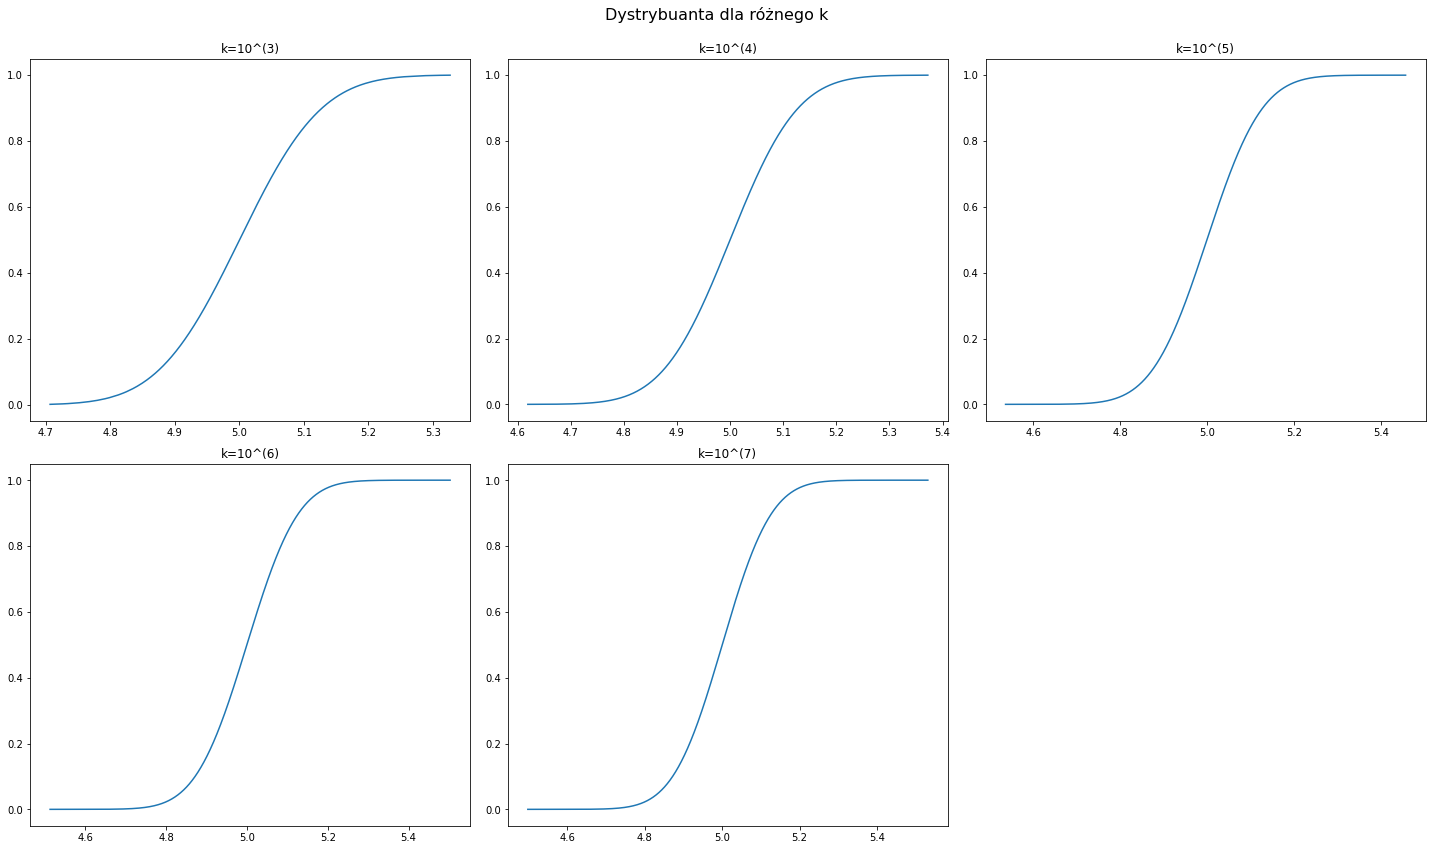

In [116]:
fig_1, axarr_1 = plt.subplots(2, 3)
fig_1.set_figheight(12)
fig_1.set_figwidth(20)
fig_1.suptitle("Dystrybuanta dla różnego k po filtracji", fontsize=16)

axarr_1[0, 0].plot(np.sort(noise_after_filtration_k3_fc1600), norm_cdf(noise_after_filtration_k3_fc1600))
axarr_1[0, 0].set_title('k=10^(3)')
axarr_1[0, 1].plot(np.sort(noise_after_filtration_k4_fc1600), norm_cdf(noise_after_filtration_k4_fc1600))
axarr_1[0, 1].set_title('k=10^(4)')
axarr_1[0, 2].plot(np.sort(noise_after_filtration_k5_fc1600), norm_cdf(noise_after_filtration_k5_fc1600))
axarr_1[0, 2].set_title('k=10^(5)')
axarr_1[1, 0].plot(np.sort(noise_after_filtration_k6_fc1600), norm_cdf(noise_after_filtration_k6_fc1600))
axarr_1[1, 0].set_title('k=10^(6)')
axarr_1[1, 1].plot(np.sort(noise_after_filtration_k7_fc1600), norm_cdf(noise_after_filtration_k7_fc1600))
axarr_1[1, 1].set_title('k=10^(7)')
axarr_1[1, 2].set_visible(False)

# Tight layout often produces nice results
# but requires the title to be spaced accordingly
fig_1.tight_layout()
fig_1.subplots_adjust(top=0.92)

fig_2, axarr_2 = plt.subplots(2, 3)
fig_2.set_figheight(12)
fig_2.set_figwidth(20)
fig_2.suptitle("Dystrybuanta dla różnego k", fontsize=16)

axarr_2[0, 0].plot(np.sort(samples_k_3), norm_cdf(samples_k_3))
axarr_2[0, 0].set_title('k=10^(3)')
axarr_2[0, 1].plot(np.sort(samples_k_4), norm_cdf(samples_k_4))
axarr_2[0, 1].set_title('k=10^(4)')
axarr_2[0, 2].plot(np.sort(samples_k_5), norm_cdf(samples_k_5))
axarr_2[0, 2].set_title('k=10^(5)')
axarr_2[1, 0].plot(np.sort(samples_k_6), norm_cdf(samples_k_6))
axarr_2[1, 0].set_title('k=10^(6)')
axarr_2[1, 1].plot(np.sort(samples_k_7), norm_cdf(samples_k_7))
axarr_2[1, 1].set_title('k=10^(7)')
axarr_2[1, 2].set_visible(False)

# Tight layout often produces nice results
# but requires the title to be spaced accordingly
fig_2.tight_layout()
fig_2.subplots_adjust(top=0.92)

plt.show()

### Obliczenie wartości oczekiwanej

In [104]:
#Dla k=10^(3)
expected_value_k1_after_filtration = describe(noise_after_filtration_k3_fc1600).mean
#Dla k=10^(4)
expected_value_k2_after_filtration = describe(noise_after_filtration_k4_fc1600).mean
#Dla k=10^(5)
expected_value_k3_after_filtration = describe(noise_after_filtration_k5_fc1600).mean
#Dla k=10^(6)
expected_value_k4_after_filtration = describe(noise_after_filtration_k6_fc1600).mean
#Dla k=10^(7)
expected_value_k5_after_filtration = describe(noise_after_filtration_k7_fc1600).mean

### Obliczenie wariancji

In [105]:
#Dla k=10^(3)
variance_k1_after_filtration = describe(noise_after_filtration_k3_fc1600).variance
#Dla k=10^(4)
variance_k2_after_filtration = describe(noise_after_filtration_k4_fc1600).variance
#Dla k=10^(5)
variance_k3_after_filtration = describe(noise_after_filtration_k5_fc1600).variance
#Dla k=10^(6)
variance_k4_after_filtration = describe(noise_after_filtration_k6_fc1600).variance
#Dla k=10^(7)
variance_k5_after_filtration = describe(noise_after_filtration_k7_fc1600).variance

Podsumowanie obliczeń wartości oczekiwanej oraz kowariancji względem różnych k

In [120]:
dict = {'k' : ['k^(3)', 'k^(4)', 'k^(5)', 'k^(6)', 'k^(7)'],
        'wartość oczekiwana' : [expected_value_k1, expected_value_k2, expected_value_k3, expected_value_k4, expected_value_k5],
        'wariancja' : [variance_k1, variance_k2, variance_k3, variance_k4, variance_k5],
        'wartość oczekiwana po filtracji' : [expected_value_k1_after_filtration, expected_value_k2_after_filtration, expected_value_k3_after_filtration, expected_value_k4_after_filtration, expected_value_k5_after_filtration],
        'wariancja po filtracji' : [variance_k1_after_filtration, variance_k2_after_filtration, variance_k3_after_filtration, variance_k4_after_filtration, variance_k5_after_filtration]}

df = pd.DataFrame(dict)

df.style

,k,wartość oczekiwana,wariancja,wartość oczekiwana po filtracji,wariancja po filtracji
0,k^(3),4.996969,0.009650,4.996047,0.008413
1,k^(4),5.002069,0.010072,5.001975,0.006543
2,k^(5),4.999625,0.010067,4.999616,0.006301
3,k^(6),5.000079,0.009985,5.000078,0.006251
4,k^(7),5.000041,0.009997,5.000041,0.006254


### Obliczenie funkcji kowariancyjnej

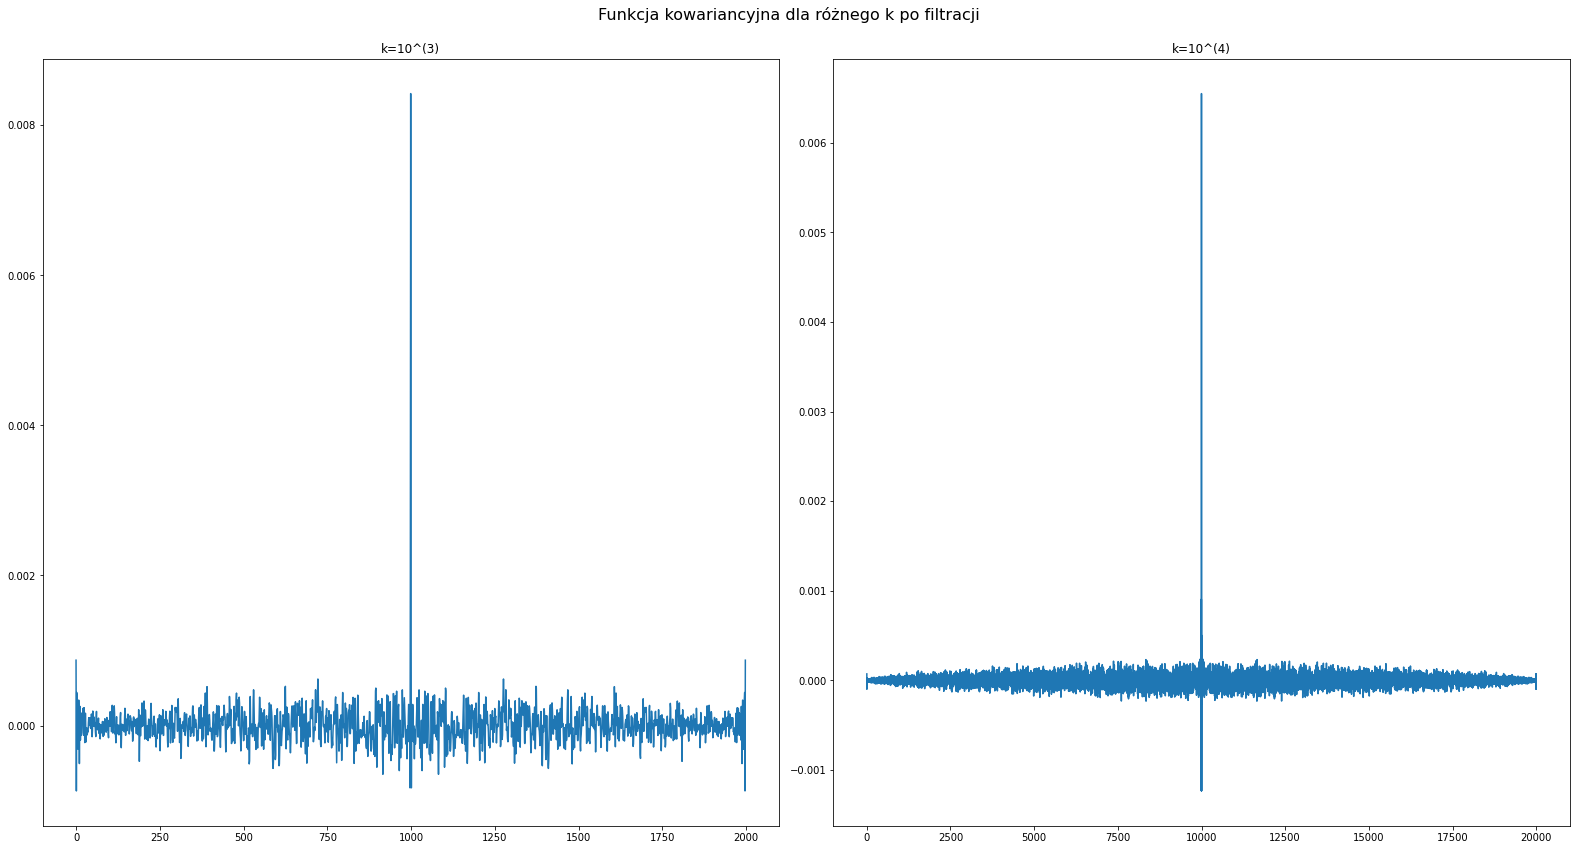

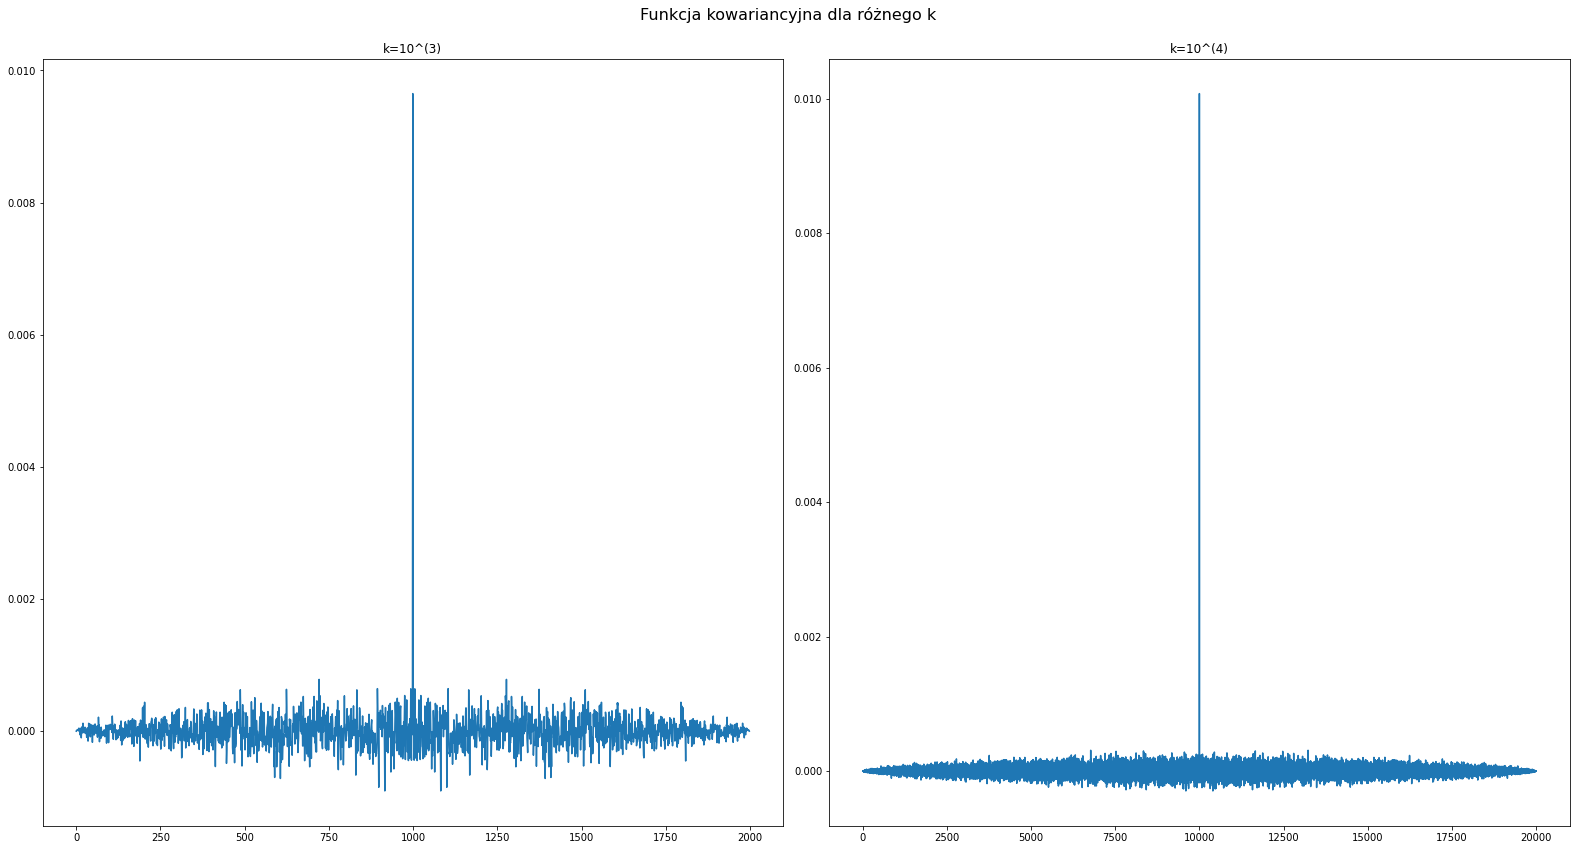

In [121]:
fig, axarr = plt.subplots(1, 2)
fig.set_figheight(12)
fig.set_figwidth(22)
fig.suptitle("Funkcja kowariancyjna dla różnego k po filtracji", fontsize=16)

axarr[0].plot(covariance(noise_after_filtration_k3_fc1600, k_3))
axarr[0].set_title('k=10^(3)')
axarr[1].plot(covariance(noise_after_filtration_k4_fc1600, k_4))
axarr[1].set_title('k=10^(4)')

# Tight layout often produces nice results
# but requires the title to be spaced accordingly
fig.tight_layout()
fig.subplots_adjust(top=0.92)

plt.show()

fig, axarr = plt.subplots(1, 2)
fig.set_figheight(12)
fig.set_figwidth(22)
fig.suptitle("Funkcja kowariancyjna dla różnego k", fontsize=16)

axarr[0].plot(covariance(samples_k_3, k_3))
axarr[0].set_title('k=10^(3)')
axarr[1].plot(covariance(samples_k_4, k_4))
axarr[1].set_title('k=10^(4)')

# Tight layout often produces nice results
# but requires the title to be spaced accordingly
fig.tight_layout()
fig.subplots_adjust(top=0.92)

plt.show()